In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.colors as colors

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import class_weight

from imblearn.over_sampling import SMOTE



pd.set_option("display.max_columns", None)

In [2]:
# Ler do dataframe original
"""df = pd.read_csv("../data/dados.csv", encoding="ISO-8859-1", sep=";", low_memory=False)
print(f'Linhas, Colunas: {df.shape} \n')
print(f'Informações: \n')
print(f'{df.info()}\n')"""


'df = pd.read_csv("../data/dados.csv", encoding="ISO-8859-1", sep=";", low_memory=False)\nprint(f\'Linhas, Colunas: {df.shape} \n\')\nprint(f\'Informações: \n\')\nprint(f\'{df.info()}\n\')'

In [3]:
#Overview do dataset
""" df.info() """

' df.info() '

In [4]:
#Carrega o dataset de taxas de rendimento
""" df_tx = pd.read_excel("../data/tx_rend.xlsx", skiprows = 8, nrows = 129307)
print(f'Linhas, Colunas: {df_tx.shape} \n')
print(f'Informações: \n')
print(f'{df_tx.info()}\n') """


' df_tx = pd.read_excel("../data/tx_rend.xlsx", skiprows = 8, nrows = 129307)\nprint(f\'Linhas, Colunas: {df_tx.shape} \n\')\nprint(f\'Informações: \n\')\nprint(f\'{df_tx.info()}\n\') '

In [5]:
#Dados os datatypes criados a partir dos dois datasets:
""" df.info()
df_tx.info() """

' df.info()\ndf_tx.info() '

In [6]:
# Criar a lista de entidade para cada uma das bases
""" lista_co_entidades_microdados = pd.Series(df['CO_ENTIDADE'].to_list())
lista_co_entidades_tx_rend = pd.Series(df_tx['CO_ENTIDADE'].to_list())
print(f'O dataset de microdados possui {len(lista_co_entidades_microdados)} códigos de entidade, enquanto o dataset de taxa de rendimentos possui {len(lista_co_entidades_tx_rend)} códigos.\n')

#Obtendo os códigos presentes em um dataset mas ausente em outro
codigos_diferentes = [cod for cod in lista_co_entidades_microdados.to_list() if cod not in lista_co_entidades_tx_rend.to_list()]
 """

" lista_co_entidades_microdados = pd.Series(df['CO_ENTIDADE'].to_list())\nlista_co_entidades_tx_rend = pd.Series(df_tx['CO_ENTIDADE'].to_list())\nprint(f'O dataset de microdados possui {len(lista_co_entidades_microdados)} códigos de entidade, enquanto o dataset de taxa de rendimentos possui {len(lista_co_entidades_tx_rend)} códigos.\n')\n\n#Obtendo os códigos presentes em um dataset mas ausente em outro\ncodigos_diferentes = [cod for cod in lista_co_entidades_microdados.to_list() if cod not in lista_co_entidades_tx_rend.to_list()]\n "

In [7]:
#Total de códigos diferentes
""" len(codigos_diferentes) """

' len(codigos_diferentes) '

In [8]:
#Criando um novo dataframe filtrando os microdados apenas para aqueles que não possuem CO_ENTIDADE que não 
#tem correspondente na base de taxa de rendimento
""" df_microdados = df.query('CO_ENTIDADE not in @codigos_diferentes').reset_index(drop=True)
df_microdados.info() """

" df_microdados = df.query('CO_ENTIDADE not in @codigos_diferentes').reset_index(drop=True)\ndf_microdados.info() "

In [9]:
#Seleciona as colunas relevantes a partir de seus índices
""" indices_col_tx = [5,45,57]
df_tx_filtrado = df_tx.iloc[:,indices_col_tx] """

' indices_col_tx = [5,45,57]\ndf_tx_filtrado = df_tx.iloc[:,indices_col_tx] '

In [10]:
""" #Renomeia as colunas do Dataframe alvo para ficarem com valores mais claros
df_tx_filtrado = df_tx_filtrado.rename(columns={"3_CAT_FUN" : "ABAND_FUND", "3_CAT_MED" : "ABAND_MED"})
df_tx_filtrado """

' #Renomeia as colunas do Dataframe alvo para ficarem com valores mais claros\ndf_tx_filtrado = df_tx_filtrado.rename(columns={"3_CAT_FUN" : "ABAND_FUND", "3_CAT_MED" : "ABAND_MED"})\ndf_tx_filtrado '

In [11]:
""" #Filtra as colunas selecionadas apenas do dataset de microdados:
indices_col_microdados = ['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES',
                         'IN_REFEITORIO', 'IN_LABORATORIO_EDUC_PROF', 'IN_SALA_MULTIUSO', 'IN_SALA_REPOUSO_ALUNO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'QT_SALAS_UTILIZADAS', 'QT_SALAS_UTILIZA_CLIMATIZADAS', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM',
                         'IN_INTERNET_COMUNIDADE', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 
                          'IN_ESPACO_ATIVIDADE', 'IN_FUND', 'IN_MED']
df_microdados_filtrado = df_microdados.loc[:,indices_col_microdados]
df_microdados_filtrado """

" #Filtra as colunas selecionadas apenas do dataset de microdados:\nindices_col_microdados = ['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES',\n                         'IN_REFEITORIO', 'IN_LABORATORIO_EDUC_PROF', 'IN_SALA_MULTIUSO', 'IN_SALA_REPOUSO_ALUNO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'QT_SALAS_UTILIZADAS', 'QT_SALAS_UTILIZA_CLIMATIZADAS', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM',\n                         'IN_INTERNET_COMUNIDADE', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', \n                          'IN_ESPACO_ATIVIDADE', 'IN_FUND', 'IN_MED']\ndf_microdados_filtrado = df_microdados.loc[:,indices_col_microdados]\ndf_microdados_filtrado "

In [12]:
# Salva os dataframes em arquivos, para um checkpoint
""" df_tx_filtrado.to_pickle("../data/tx_aband.pk1")
df_microdados_filtrado.to_feather("../data/microdados.feather")
df_tx_filtrado.info()
df_microdados_filtrado.info() """

' df_tx_filtrado.to_pickle("../data/tx_aband.pk1")\ndf_microdados_filtrado.to_feather("../data/microdados.feather")\ndf_tx_filtrado.info()\ndf_microdados_filtrado.info() '

In [13]:
#Carrega do backup
df_tx_use = pd.read_pickle("../data/tx_aband.pk1")
df_mc_use = pd.read_feather("../data/microdados.feather")

df_microdados = df_mc_use.copy()
df_tx = df_tx_use.copy()
df_tx.info()
df_microdados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129307 entries, 0 to 129306
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CO_ENTIDADE  129307 non-null  int64 
 1   ABAND_FUND   129307 non-null  object
 2   ABAND_MED    129307 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129307 entries, 0 to 129306
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CO_ENTIDADE                    129307 non-null  int64  
 1   IN_AGUA_POTAVEL                129307 non-null  float64
 2   IN_ENERGIA_INEXISTENTE         129307 non-null  float64
 3   IN_ESGOTO_INEXISTENTE          129307 non-null  float64
 4   IN_BANHEIRO                    129307 non-null  float64
 5   IN_BIBLIOTECA_SALA_LEITURA     129307 non-null  float64
 6   IN_COZINHA                

In [14]:
#Produz um dataframe unindo a partir da coluna de CO_ENTIDADE
df_microdados = pd.merge(df_microdados, df_tx, on="CO_ENTIDADE")
df_microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129307 entries, 0 to 129306
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CO_ENTIDADE                    129307 non-null  int64  
 1   IN_AGUA_POTAVEL                129307 non-null  float64
 2   IN_ENERGIA_INEXISTENTE         129307 non-null  float64
 3   IN_ESGOTO_INEXISTENTE          129307 non-null  float64
 4   IN_BANHEIRO                    129307 non-null  float64
 5   IN_BIBLIOTECA_SALA_LEITURA     129307 non-null  float64
 6   IN_COZINHA                     129307 non-null  float64
 7   IN_LABORATORIO_CIENCIAS        129307 non-null  float64
 8   IN_LABORATORIO_INFORMATICA     129307 non-null  float64
 9   IN_PARQUE_INFANTIL             129307 non-null  float64
 10  IN_QUADRA_ESPORTES             129307 non-null  float64
 11  IN_REFEITORIO                  129307 non-null  float64
 12  IN_LABORATORIO_EDUC_PROF      

In [15]:
df_microdados

,CO_ENTIDADE,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_LABORATORIO_EDUC_PROF,IN_SALA_MULTIUSO,IN_SALA_REPOUSO_ALUNO,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,IN_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_PROF_BIBLIOTECARIO,IN_PROF_SAUDE,IN_ALIMENTACAO,IN_ESPACO_ATIVIDADE,IN_FUND,IN_MED,ABAND_FUND,ABAND_MED
0,11022558,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,--
1,11024291,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,--
2,11024372,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,--
3,11024666,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,--
4,11024682,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36.0,12.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.7,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,53084020,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,--
129303,53084039,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,--
129304,53084055,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0
129305,53085000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,20.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,--


In [16]:
#Dividir as bases que tem fund e as que não tem IN_FUND e IN_MED
df_microdados_fund = df_microdados.query('IN_FUND == 1').reset_index(drop=True)
df_microdados_med = df_microdados.query('IN_MED == 1').reset_index(drop=True)

#Remover as colunas de indicador já que a divisão já foi feita
df_microdados_fund = df_microdados_fund.drop(['IN_FUND', 'IN_MED', 'ABAND_MED' ], axis =1)
df_microdados_med = df_microdados_med.drop(['IN_FUND', 'IN_MED', 'ABAND_FUND' ], axis =1)

df_microdados_fund['ABAND_FUND'] = df_microdados_fund['ABAND_FUND'].replace('--', 0)
df_microdados_med['ABAND_MED'] = df_microdados_med['ABAND_MED'].replace('--', 0)
df_microdados_fund['ABAND_FUND'] = df_microdados_fund['ABAND_FUND'].astype('float')
df_microdados_med['ABAND_MED'] = df_microdados_med['ABAND_MED'].astype('float')

In [17]:
df_microdados_fund.head()

,CO_ENTIDADE,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_LABORATORIO_EDUC_PROF,IN_SALA_MULTIUSO,IN_SALA_REPOUSO_ALUNO,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,IN_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_PROF_BIBLIOTECARIO,IN_PROF_SAUDE,IN_ALIMENTACAO,IN_ESPACO_ATIVIDADE,ABAND_FUND
0,11022558,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,11024291,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11024372,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,11024666,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,11024682,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,36.0,12.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.7


In [18]:
df_microdados_med.info(max_cols =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29384 entries, 0 to 29383
Columns: 29 entries, CO_ENTIDADE to ABAND_MED
dtypes: float64(28), int64(1)
memory usage: 6.5 MB


In [19]:
#Estatísticas básicas das variáveis instituições fundamental
df_microdados_fund.describe(include = 'all')

,CO_ENTIDADE,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_LABORATORIO_EDUC_PROF,IN_SALA_MULTIUSO,IN_SALA_REPOUSO_ALUNO,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,IN_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_PROF_BIBLIOTECARIO,IN_PROF_SAUDE,IN_ALIMENTACAO,IN_ESPACO_ATIVIDADE,ABAND_FUND
count,1.208560e+05,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.00000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000,120856.000000
mean,2.948470e+07,0.946689,0.024699,0.053502,0.964255,0.573426,0.918349,0.134971,0.361546,0.27153,0.457727,0.416065,0.002540,0.082379,0.017153,0.336069,8.934534,3.143692,0.509697,0.387072,0.146000,0.846238,0.580219,0.046675,0.253955,0.033188,0.831858,0.871235,1.271425
std,9.957755e+06,0.224655,0.155206,0.225033,0.185655,0.494581,0.273833,0.341694,0.480450,0.44475,0.498212,0.492907,0.050337,0.274942,0.129841,0.472365,7.502730,6.179498,0.499908,0.487082,0.353108,0.360721,0.493525,0.210943,0.435274,0.179129,0.373994,1.890061,3.937556
min,1.100006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.213393e+07,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.932659e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.513424e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,12.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.800000
max,5.308601e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,312.000000,117.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,100.000000


In [20]:
#Estatísticas básicas das variáveis instituições med
df_microdados_med.describe(include = 'all')

,CO_ENTIDADE,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_BANHEIRO,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PARQUE_INFANTIL,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_LABORATORIO_EDUC_PROF,IN_SALA_MULTIUSO,IN_SALA_REPOUSO_ALUNO,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,IN_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_PROF_BIBLIOTECARIO,IN_PROF_SAUDE,IN_ALIMENTACAO,IN_ESPACO_ATIVIDADE,ABAND_MED
count,2.938400e+04,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.00000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000,29384.000000
mean,3.267633e+07,0.975871,0.003778,0.012013,0.986796,0.880377,0.907433,0.483222,0.697080,0.213960,0.772053,0.541111,0.025150,0.150898,0.026545,0.242275,14.56786,6.101960,0.799415,0.564695,0.223115,0.967465,0.800538,0.080996,0.491152,0.083106,0.725633,0.723319,4.535849
std,9.545575e+06,0.153452,0.061347,0.108947,0.114151,0.324526,0.289830,0.499727,0.459529,0.410106,0.419515,0.498316,0.156582,0.357956,0.160752,0.428467,10.13520,9.615673,0.400445,0.495805,0.416342,0.177418,0.399603,0.272834,0.499930,0.276048,0.446202,1.662303,7.466137
min,1.100006e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.616898e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.308866e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.100000
75%,3.592001e+07,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.00000,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,6.600000
max,5.308601e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,262.00000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,100.000000


In [21]:
#Analise descritiva para a variável alvo fundamental
df_microdados_fund['ABAND_FUND'].describe()

count    120856.000000
mean          1.271425
std           3.937556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         100.000000
Name: ABAND_FUND, dtype: float64

In [22]:
#Analise descritiva para a variável alvo médio
df_microdados_med['ABAND_MED'].describe()

count    29384.000000
mean         4.535849
std          7.466137
min          0.000000
25%          0.000000
50%          1.100000
75%          6.600000
max        100.000000
Name: ABAND_MED, dtype: float64

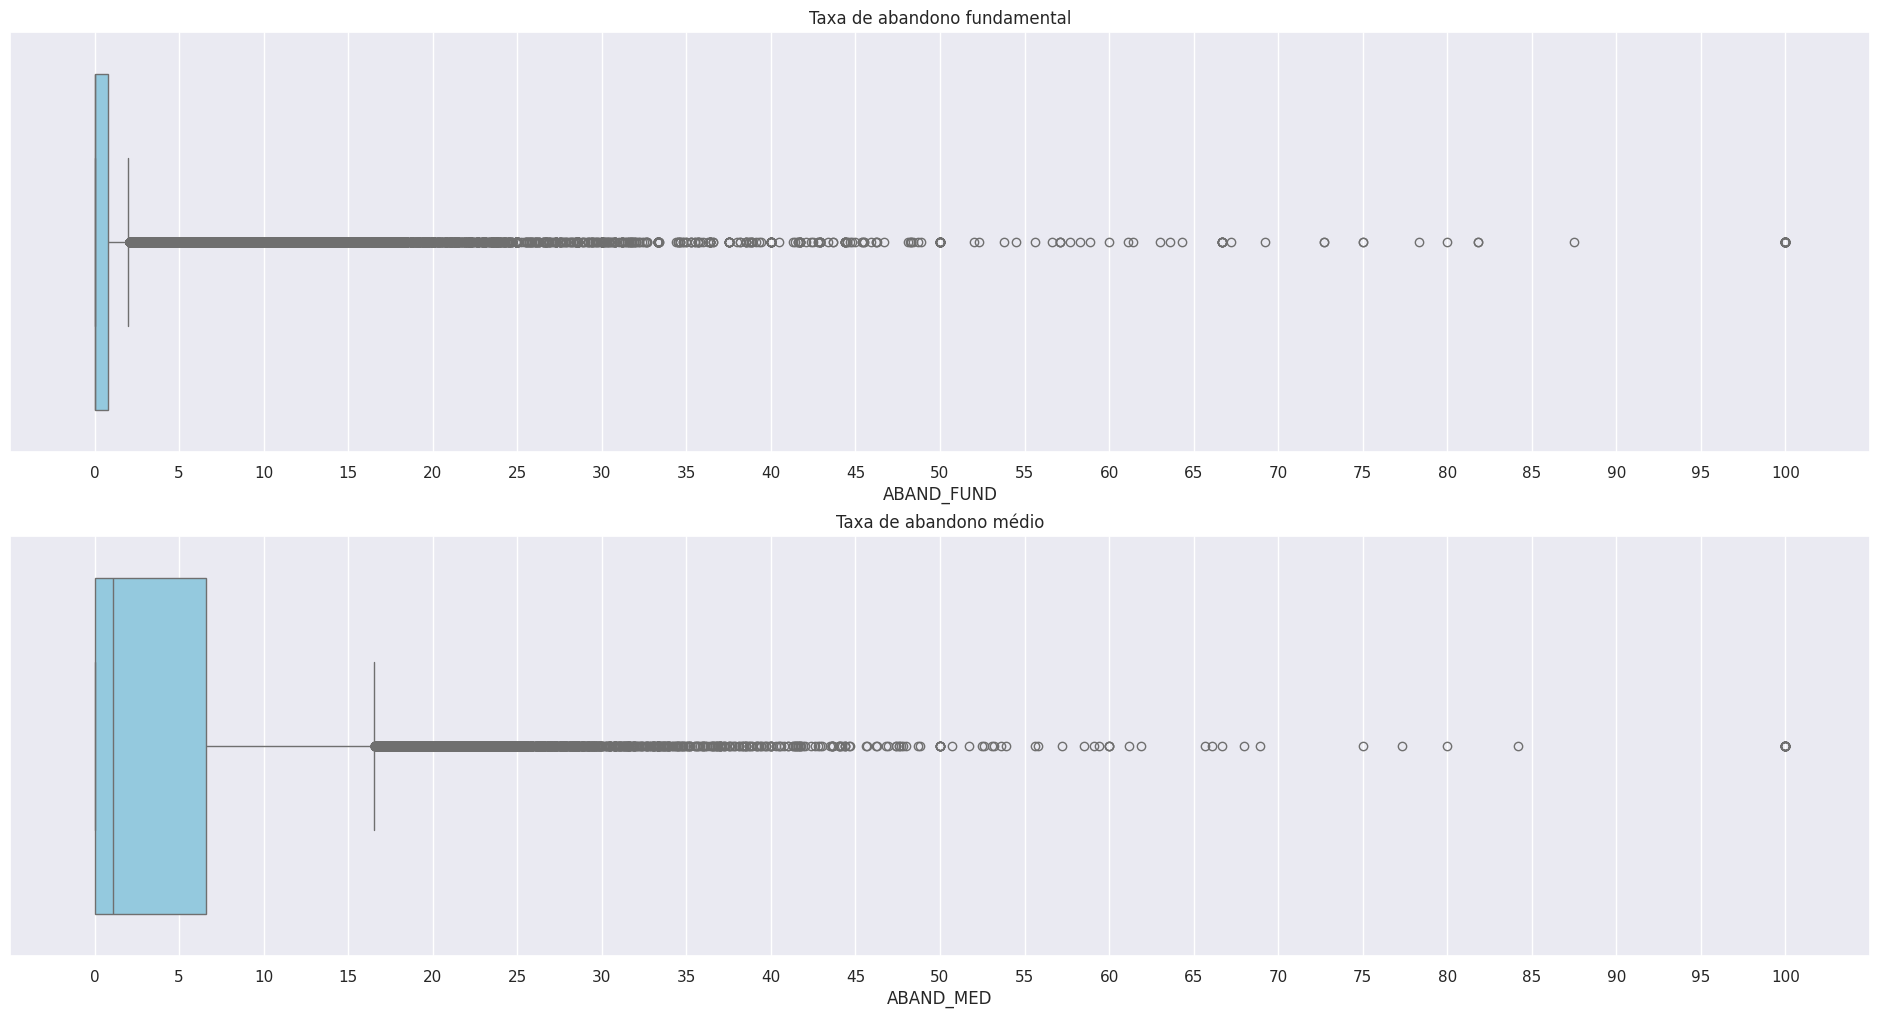

In [23]:
sns.set_theme()
plt.figure(figsize=(24,12))
plt.subplot(2,1,1)
sns.boxplot(data=df_microdados_fund, x='ABAND_FUND', color='skyblue')
plt.title("Taxa de abandono fundamental")
plt.xticks(range(0,101,5))

plt.subplot(2,1,2)
sns.boxplot(data=df_microdados_med, x='ABAND_MED', color='skyblue')
plt.title("Taxa de abandono médio")
plt.xticks(range(0,101,5))

plt.show()


In [24]:
# Lista para armazenar as colunas relevantes
relevant_columns_fund = []
irelevant_columns_fund = []
#Itera sobre as colunas do dataframe para criar uma tabela de contigência entre cada coluna e a variável alvo
for column in df_microdados_fund.columns:
    contigency_table = pd.crosstab(df_microdados_fund[column],df_microdados_fund['ABAND_FUND'])
    _, p, _, _ = chi2_contingency(contigency_table)
    
    if p < 0.05:
        relevant_columns_fund.append(column)
    else:
        irelevant_columns_fund.append(column)
    
print(relevant_columns_fund)
print(irelevant_columns_fund)
    

['IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 'IN_ESPACO_ATIVIDADE', 'ABAND_FUND']
['CO_ENTIDADE', 'IN_LABORATORIO_EDUC_PROF', 'IN_SALA_REPOUSO_ALUNO', 'QT_SALAS_UTILIZADAS', 'QT_SALAS_UTILIZA_CLIMATIZADAS', 'IN_INTERNET_COMUNIDADE']


In [25]:
# Lista para armazenar as colunas relevantes
relevant_columns_med = []
#Itera sobre as colunas do dataframe para criar uma tabela de contigência entre cada coluna e a variável alvo
for column in df_microdados_med.columns:
    contigency_table = pd.crosstab(df_microdados_med[column],df_microdados_med['ABAND_MED'])
    _, p, _, _ = chi2_contingency(contigency_table)
    
    if p < 0.05:
        relevant_columns_med.append(column)
    
print(relevant_columns_med)

['IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'QT_SALAS_UTILIZADAS', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 'IN_ESPACO_ATIVIDADE', 'ABAND_MED']


In [26]:
common_coluns = [i for i in relevant_columns_fund if i in relevant_columns_med]

print (f'Colunas em comum: {common_coluns}')

Colunas em comum: ['IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 'IN_ESPACO_ATIVIDADE']


In [27]:
#Reorganizando os DFs com apenas as colunas relevantes
relevant_columns_fund = ['CO_ENTIDADE'] + common_coluns + ['ABAND_FUND']
relevant_columns_med = ['CO_ENTIDADE'] + common_coluns + ['ABAND_MED']
print(f'Relevant coluns for fund: {relevant_columns_fund} \n Relevant coluns for med: {relevant_columns_med}')
#df_microdados_fund = df_microdados_fund[relevant_columns_fund]
#df_microdados_med = df_microdados_med[relevant_columns_med]

len(df_microdados_med.columns)
#len(df_microdados_fund.columns)

Relevant coluns for fund: ['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'IN_PROF_BIBLIOTECARIO', 'IN_PROF_SAUDE', 'IN_ALIMENTACAO', 'IN_ESPACO_ATIVIDADE', 'ABAND_FUND'] 
 Relevant coluns for med: ['CO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_INEXISTENTE', 'IN_BANHEIRO', 'IN_BIBLIOTECA_SALA_LEITURA', 'IN_COZINHA', 'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES', 'IN_REFEITORIO', 'IN_SALA_MULTIUSO', 'IN_ACESSIBILIDADE_INEXISTENTE', 'IN_DESKTOP_ALUNO', 'IN_COMP_PORTATIL_ALUNO', 'IN_TABLET_ALUNO', 'IN_INTERNET', 'IN_INTERNET_APRENDIZAGEM', 'I

29

In [28]:
df_microdados_fund = df_microdados_fund[relevant_columns_fund]
df_microdados_med = df_microdados_med[relevant_columns_med]

In [29]:
#Visualizando os valores únicos
unique_target_fund = sorted(df_microdados_fund['ABAND_FUND'].unique())
unique_target_med = sorted(df_microdados_med['ABAND_MED'].unique())

print(f'Distinct fund: {unique_target_fund} \n Distinct med: {unique_target_med}')

Distinct fund: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0

In [30]:
#Encontrando os percentis com valores significativos
final = {}
for i in np.arange(0,1,0.01) :
    
    if df_microdados_fund['ABAND_FUND'].quantile(i) > 0:
        final[i] = df_microdados_fund['ABAND_FUND'].quantile(i)
print(final)

print(len(final.keys()))



{0.66: 0.1, 0.67: 0.2, 0.68: 0.3, 0.6900000000000001: 0.3, 0.7000000000000001: 0.4, 0.71: 0.5, 0.72: 0.5, 0.73: 0.6, 0.74: 0.7, 0.75: 0.8, 0.76: 0.9, 0.77: 1.0, 0.78: 1.1, 0.79: 1.2, 0.8: 1.4, 0.81: 1.5, 0.8200000000000001: 1.7, 0.8300000000000001: 1.8, 0.84: 2.0, 0.85: 2.2, 0.86: 2.5, 0.87: 2.7, 0.88: 3.0, 0.89: 3.4, 0.9: 3.7, 0.91: 4.1, 0.92: 4.6, 0.93: 5.2, 0.9400000000000001: 5.9, 0.9500000000000001: 6.7, 0.96: 7.9, 0.97: 9.5, 0.98: 12.1, 0.99: 16.7}
34


In [31]:
#Encontrando os percentis com valores significativos
final = {}
for i in np.arange(0,1,0.01) :
    
    if df_microdados_med['ABAND_MED'].quantile(i) > 0:
        final[i] = df_microdados_med['ABAND_MED'].quantile(i)
print(final)
print(len(final.keys()))




{0.43: 0.2, 0.44: 0.3, 0.45: 0.4, 0.46: 0.6, 0.47000000000000003: 0.7, 0.48: 0.8, 0.49: 0.9, 0.5: 1.1, 0.51: 1.2, 0.52: 1.3, 0.53: 1.5, 0.54: 1.6, 0.55: 1.8, 0.56: 2.0, 0.5700000000000001: 2.1, 0.58: 2.3, 0.59: 2.5, 0.6: 2.7, 0.61: 2.9, 0.62: 3.2, 0.63: 3.4, 0.64: 3.6, 0.65: 3.8, 0.66: 4.1, 0.67: 4.3, 0.68: 4.6, 0.6900000000000001: 4.8, 0.7000000000000001: 5.1, 0.71: 5.4, 0.72: 5.6, 0.73: 6.0, 0.74: 6.3, 0.75: 6.6, 0.76: 6.9, 0.77: 7.3, 0.78: 7.7, 0.79: 8.0, 0.8: 8.4, 0.81: 8.7, 0.8200000000000001: 9.2, 0.8300000000000001: 9.6, 0.84: 10.1, 0.85: 10.6, 0.86: 11.2, 0.87: 11.8, 0.88: 12.4, 0.89: 13.0, 0.9: 13.7, 0.91: 14.5, 0.92: 15.4, 0.93: 16.4, 0.9400000000000001: 17.5, 0.9500000000000001: 18.9, 0.96: 20.6, 0.97: 22.9, 0.98: 25.8, 0.99: 31.3}
57


In [32]:
#Definição dos limites conforme encontrado na análise
limites_bins_fund = [-0.1, 0.1, 0.7, 1.8, 4.1, 100]
limites_bins_med = [-0.1, 0.2, 2.1, 5.4, 10.6, 100]

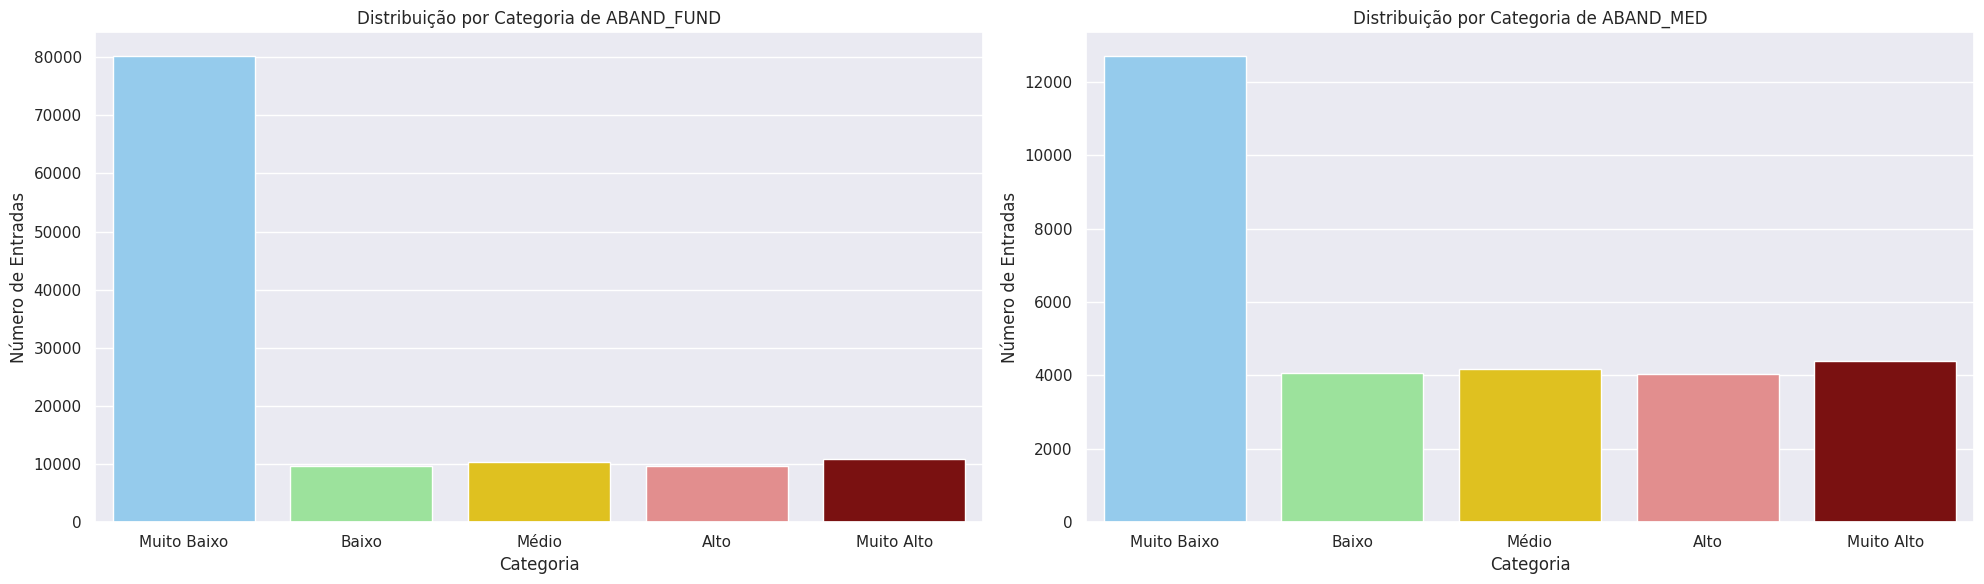

In [33]:
#Construção dos gráficos para visualizar a distribuição dentro dos dataframes
ordinal_classes = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']

def gerar_grafico_aband_fund():
    
    categorias = pd.cut(df_microdados_fund["ABAND_FUND"], limites_bins_fund, labels=ordinal_classes)
    cores = ['lightskyblue', 'lightgreen', 'gold','lightcoral', 'darkred']
    cmap = colors.LinearSegmentedColormap.from_list("", cores)

    df_microdados_fund_agrupado = df_microdados_fund.groupby(categorias).size().reset_index().rename(columns={0: 'CONTAGEM'})
    sns.barplot(x='ABAND_FUND', y='CONTAGEM', data=df_microdados_fund_agrupado, hue='ABAND_FUND', palette=cores)

    plt.xlabel('Categoria')
    plt.ylabel('Número de Entradas')
    plt.title('Distribuição por Categoria de ABAND_FUND')

def gerar_grafico_aband_med():
    
    categorias = pd.cut(df_microdados_med["ABAND_MED"], limites_bins_med, labels=ordinal_classes)
    cores = ['lightskyblue', 'lightgreen', 'gold','lightcoral', 'darkred']
    cmap = colors.LinearSegmentedColormap.from_list("", cores)

    df_microdados_fund_agrupado = df_microdados_fund.groupby(categorias).size().reset_index().rename(columns={0: 'CONTAGEM'})
    sns.barplot(x='ABAND_MED', y='CONTAGEM', data=df_microdados_fund_agrupado, hue='ABAND_MED', palette=cores)

    plt.xlabel('Categoria')
    plt.ylabel('Número de Entradas')
    plt.title('Distribuição por Categoria de ABAND_MED')


# Gerar os gráficos em figuras separadas
plt.figure(figsize=(20, 6))  # Definir tamanho da figura (opcional)

# Gerar e posicionar o primeiro gráfico
subplot1 = plt.subplot(1, 2, 1)  # Criar subplot na posição 1, 2 (linha 1, coluna 1)
gerar_grafico_aband_fund()


# Gerar e posicionar o segundo gráfico
subplot2 = plt.subplot(1, 2, 2)  # Criar subplot na posição 1, 2 (linha 1, coluna 2)
gerar_grafico_aband_med()

plt.tight_layout()

# Apresentar os gráficos na tela
plt.show()

In [34]:
df_microdados_fund['CLASSE_ABAND'] = pd.cut(df_microdados_fund['ABAND_FUND'], bins=limites_bins_fund, labels=ordinal_classes)
df_microdados_med['CLASSE_ABAND'] = pd.cut(df_microdados_med['ABAND_MED'], bins=limites_bins_med, labels=ordinal_classes)

# Regressão Logística


In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, loguniform

X = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y = df_microdados_fund['CLASSE_ABAND']

# Cria um objeto SMOTE
smote = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled, y_resampled = smote.fit_resample(X, y)

# Encode labels
label_encoder = LabelEncoder()
y_resampled = pd.Series(label_encoder.fit_transform(y_resampled))

# Parâmetros para o RandomizedSearch
param_distributions = {
    'logistic__C': loguniform(1e-4, 1e4),
    'logistic__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logistic__solver': ['saga'],  # saga supports l1, l2, and elasticnet
    'logistic__l1_ratio': uniform(0, 1)  # Only used if penalty is elasticnet
}

# Criação do pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(multi_class="multinomial", max_iter=10000, class_weight='balanced'))
])

print(f'Using pipeline: {pipeline}')
# RandomizedSearchCV para LogisticRegression com pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=5, scoring='f1_weighted')
random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

print(f'Melhor modelo encontrado: {best_model}')
# Avaliação adicional usando cross_val_score com mais dobras (e.g., 10 dobras)
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Usar cross_val_score para calcular as métricas de desempenho
scores = cross_val_score(best_model, X_resampled, y_resampled, cv=skfold, scoring='f1_weighted')

# Cálculo das métricas
mean_f1 = np.mean(scores)
print("Média de F1-score:", mean_f1)

# Avaliação de outras métricas
results = cross_validate(best_model, X_resampled, y_resampled, cv=skfold, scoring=scoring)

mean_accuracy = np.mean(results['test_accuracy'])
mean_precision = np.mean(results['test_precision_weighted'])
mean_recall = np.mean(results['test_recall_weighted'])
mean_auc = np.mean(results['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy)
print("Média de Precision:", mean_precision)
print("Média de Recall:", mean_recall)
print("Média de AUC-ROC:", mean_auc)




Using pipeline: Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    multi_class='multinomial'))])


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172:

Melhor modelo encontrado: Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.00011390176182186631,
                                    class_weight='balanced',
                                    l1_ratio=0.023062425041415757,
                                    max_iter=10000, multi_class='multinomial',
                                    penalty='elasticnet', solver='saga'))])
Média de F1-score: 0.32571084009306384
Média de Accuracy: 0.34416947040498436
Média de Precision: 0.3403062297391086
Média de Recall: 0.34416947040498436
Média de AUC-ROC: 0.6731525764307411


In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y = df_microdados_fund['CLASSE_ABAND']

# Cria um objeto SMOTE
smote = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled, y_resampled = smote.fit_resample(X, y)

# Encode labels
label_encoder = LabelEncoder()
y_resampled = pd.Series(label_encoder.fit_transform(y_resampled))

# Parâmetros para o RandomizedSearch
param_distributions = {
    'C': np.logspace(-4, 4, 1000),  # Variação maior para C
    'penalty': ['elasticnet'],  # Apenas 'elasticnet' é usado
    'solver': ['saga'],  # Apenas 'saga' é usado
    'l1_ratio': np.linspace(0, 1, 1000)  # Variação maior para l1_ratio
}

# RandomizedSearchCV para LogisticRegression
random_search = RandomizedSearchCV(LogisticRegression(multi_class="multinomial", max_iter=100000, class_weight='balanced'), param_distributions, n_iter=50, cv=6, scoring='f1_weighted', random_state=42)
random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Usar cross_validate para calcular as métricas de desempenho
results = cross_validate(best_model, X_resampled, y_resampled, cv=skfold, scoring=scoring)

# Cálculo das médias das métricas
mean_accuracy = np.mean(results['test_accuracy'])
mean_precision = np.mean(results['test_precision_weighted'])
mean_recall = np.mean(results['test_recall_weighted'])
mean_f1 = np.mean(results['test_f1_weighted'])
mean_auc = np.mean(results['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy)
print("Média de Precision:", mean_precision)
print("Média de Recall:", mean_recall)
print("Média de F1-score:", mean_f1)
print("Média de AUC-ROC:", mean_auc)

print(best_model)


Média de Accuracy: 0.3430778816199377
Média de Precision: 0.33715479211099825
Média de Recall: 0.3430778816199377
Média de F1-score: 0.3257084335471583
Média de AUC-ROC: 0.6729671859939248
LogisticRegression(C=0.007618717702322999, class_weight='balanced',
                   l1_ratio=0.7967967967967968, max_iter=100000,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')


In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])
y = df_microdados_med['CLASSE_ABAND']

# Cria um objeto SMOTE
smote = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled, y_resampled = smote.fit_resample(X, y)

# Encode labels
label_encoder = LabelEncoder()
y_resampled = pd.Series(label_encoder.fit_transform(y_resampled))

# Parâmetros para o RandomizedSearch
param_distributions = {
    'C': np.logspace(-4, 4, 1000),  # Variação maior para C
    'penalty': ['elasticnet'],  # Apenas 'elasticnet' é usado
    'solver': ['saga'],  # Apenas 'saga' é usado
    'l1_ratio': np.linspace(0, 1, 1000)  # Variação maior para l1_ratio
}

# RandomizedSearchCV para LogisticRegression
random_search = RandomizedSearchCV(LogisticRegression(multi_class="multinomial", max_iter=100000, class_weight='balanced'), param_distributions, n_iter=50, cv=6, scoring='f1_weighted', random_state=13)
random_search.fit(X_resampled, y_resampled)

best_model = random_search.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

# Usar cross_validate para calcular as métricas de desempenho
results = cross_validate(best_model, X_resampled, y_resampled, cv=skfold, scoring=scoring)

# Cálculo das médias das métricas
mean_accuracy = np.mean(results['test_accuracy'])
mean_precision = np.mean(results['test_precision_weighted'])
mean_recall = np.mean(results['test_recall_weighted'])
mean_f1 = np.mean(results['test_f1_weighted'])
mean_auc = np.mean(results['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy)
print("Média de Precision:", mean_precision)
print("Média de Recall:", mean_recall)
print("Média de F1-score:", mean_f1)
print("Média de AUC-ROC:", mean_auc)

print(best_model)


Média de Accuracy: 0.36020456333595596
Média de Precision: 0.36522404787452406
Média de Recall: 0.36020456333595596
Média de F1-score: 0.35874923563409916
Média de AUC-ROC: 0.6697657512716342
LogisticRegression(C=0.3593813663804626, class_weight='balanced',
                   l1_ratio=0.6456456456456456, max_iter=100000,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')


# Árvore de Decisão

In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

X_dt = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y_dt = df_microdados_fund['CLASSE_ABAND']

# Cria um objeto SMOTE
smote_dt = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled_dt, y_resampled_dt = smote_dt.fit_resample(X_dt, y_dt)

# Encode labels
label_encoder_dt = LabelEncoder()
y_resampled_dt = pd.Series(label_encoder_dt.fit_transform(y_resampled_dt))

# Parâmetros para o RandomizedSearch
param_distributions_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 100),  # Ampliando o intervalo para max_depth
    'min_samples_split': randint(2, 100),  # Ampliando o intervalo para min_samples_split
    'min_samples_leaf': randint(1, 50),  # Mantendo o intervalo para min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],  # Mantendo as opções para min_impurity_decrease
    'splitter': ['best', 'random'],  # Mantendo as opções para splitter
}

# RandomizedSearchCV para DecisionTreeClassifier
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions_dt, n_iter=100, cv=5, scoring='f1_weighted', random_state=13)
random_search_dt.fit(X_resampled_dt, y_resampled_dt)

best_model_dt = random_search_dt.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring_dt = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold_dt = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

# Usar cross_validate para calcular as métricas de desempenho
results_dt = cross_validate(best_model_dt, X_resampled_dt, y_resampled_dt, cv=skfold_dt, scoring=scoring_dt)

# Cálculo das médias das métricas
mean_accuracy_dt = np.mean(results_dt['test_accuracy'])
mean_precision_dt = np.mean(results_dt['test_precision_weighted'])
mean_recall_dt = np.mean(results_dt['test_recall_weighted'])
mean_f1_dt = np.mean(results_dt['test_f1_weighted'])
mean_auc_dt = np.mean(results_dt['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy_dt)
print("Média de Precision:", mean_precision_dt)
print("Média de Recall:", mean_recall_dt)
print("Média de F1-score:", mean_f1_dt)
print("Média de AUC-ROC:", mean_auc_dt)

print(best_model_dt)


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/base

Média de Accuracy: 0.4323165109034267
Média de Precision: 0.4476558427260506
Média de Recall: 0.4323165109034267
Média de F1-score: 0.43066381999999565
Média de AUC-ROC: 0.7618485376500617
DecisionTreeClassifier(class_weight='balanced', max_depth=46,
                       min_samples_leaf=19, min_samples_split=70)


In [44]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint

X_dt = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])
y_dt = df_microdados_med['CLASSE_ABAND']

# Cria um objeto SMOTE
smote_dt = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled_dt, y_resampled_dt = smote_dt.fit_resample(X_dt, y_dt)

# Encode labels
label_encoder_dt = LabelEncoder()
y_resampled_dt = pd.Series(label_encoder_dt.fit_transform(y_resampled_dt))

# Parâmetros para o RandomizedSearch
param_distributions_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 100),  # Ampliando o intervalo para max_depth
    'min_samples_split': randint(2, 100),  # Ampliando o intervalo para min_samples_split
    'min_samples_leaf': randint(1, 50),  # Mantendo o intervalo para min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3],  # Mantendo as opções para min_impurity_decrease
    'splitter': ['best', 'random'],  # Mantendo as opções para splitter
}

# RandomizedSearchCV para DecisionTreeClassifier
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions_dt, n_iter=100, cv=5, scoring='f1_weighted', random_state=13)
random_search_dt.fit(X_resampled_dt, y_resampled_dt)

best_model_dt = random_search_dt.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring_dt = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold_dt = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

# Usar cross_validate para calcular as métricas de desempenho
results_dt = cross_validate(best_model_dt, X_resampled_dt, y_resampled_dt, cv=skfold_dt, scoring=scoring_dt)

# Cálculo das médias das métricas
mean_accuracy_dt = np.mean(results_dt['test_accuracy'])
mean_precision_dt = np.mean(results_dt['test_precision_weighted'])
mean_recall_dt = np.mean(results_dt['test_recall_weighted'])
mean_f1_dt = np.mean(results_dt['test_f1_weighted'])
mean_auc_dt = np.mean(results_dt['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy_dt)
print("Média de Precision:", mean_precision_dt)
print("Média de Recall:", mean_recall_dt)
print("Média de F1-score:", mean_f1_dt)
print("Média de AUC-ROC:", mean_auc_dt)

print(best_model_dt)


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/base

Média de Accuracy: 0.42100708103855233
Média de Precision: 0.43932515314192744
Média de Recall: 0.42100708103855233
Média de F1-score: 0.4270118860405928
Média de AUC-ROC: 0.740666431024098
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=88, min_samples_leaf=9, min_samples_split=20,
                       splitter='random')


In [47]:
best_model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 46,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 19,
 'min_samples_split': 70,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Random Forest

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, uniform

# Preparação dos dados
X_rf = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y_rf = df_microdados_fund['CLASSE_ABAND']

# Cria um objeto SMOTE
smote_rf = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled_rf, y_resampled_rf = smote_rf.fit_resample(X_rf, y_rf)

# Encode labels
label_encoder_rf = LabelEncoder()
y_resampled_rf = pd.Series(label_encoder_rf.fit_transform(y_resampled_rf))

# Parâmetros para o RandomizedSearch
param_distributions_rf = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# RandomizedSearchCV para RandomForestClassifier
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions_rf, n_iter=20, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=3)
random_search_rf.fit(X_resampled_rf, y_resampled_rf)

best_model_rf = random_search_rf.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring_rf = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold_rf = StratifiedKFold(n_splits=10, shuffle=True)

# Usar cross_validate para calcular as métricas de desempenho
results_rf = cross_validate(best_model_rf, X_resampled_rf, y_resampled_rf, cv=skfold_rf, scoring=scoring_rf)

# Cálculo das médias das métricas
mean_accuracy_rf = np.mean(results_rf['test_accuracy'])
mean_precision_rf = np.mean(results_rf['test_precision_weighted'])
mean_recall_rf = np.mean(results_rf['test_recall_weighted'])
mean_f1_rf = np.mean(results_rf['test_f1_weighted'])
mean_auc_rf = np.mean(results_rf['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy_rf)
print("Média de Precision:", mean_precision_rf)
print("Média de Recall:", mean_recall_rf)
print("Média de F1-score:", mean_f1_rf)
print("Média de AUC-ROC:", mean_auc_rf)

print(best_model_rf)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 3/3] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=405;, score=0.403 total time= 2.2min
[CV 2/3] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=405;, score=0.432 total time= 2.2min
[CV 1/3] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=405;, score=0.355 total time= 2.3min
[CV 3/3] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=16, n_estimators=218;, score=0.380 total time= 3.0min
[CV 2/3] END bootstrap=True, class_weight=balanced, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=16, n_estimators=218;, score=0.396 total time= 3.1min
[CV 1/3] END bootstrap=True

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END bootstrap=True, class_weight=balanced_subsample, max_depth=24, max_features=sqrt, min_samples_leaf=18, min_samples_split=6, n_estimators=897;, score=0.359 total time= 5.3min
[CV 3/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=17, n_estimators=977;, score=0.434 total time= 6.8min
[CV 2/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=17, n_estimators=977;, score=0.460 total time= 7.0min
[CV 1/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=18, max_features=log2, min_samples_leaf=8, min_samples_split=17, n_estimators=977;, score=0.381 total time= 7.5min
[CV 2/3] END bootstrap=True, class_weight=None, max_depth=41, max_features=None, min_samples_leaf=15, min_samples_split=3, n_estimators=260;, score=0.444 total time= 4.1min
[CV 3/3] END bootstrap=True, class_weight=None, max_depth=41, max_features=N

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, uniform

# Preparação dos dados
X_rf = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])
y_rf = df_microdados_med['CLASSE_ABAND']

# Cria um objeto SMOTE
smote_rf = SMOTE()

# Gera amostras sintéticas para a classe minoritária
X_resampled_rf, y_resampled_rf = smote_rf.fit_resample(X_rf, y_rf)

# Encode labels
label_encoder_rf = LabelEncoder()
y_resampled_rf = pd.Series(label_encoder_rf.fit_transform(y_resampled_rf))

# Parâmetros para o RandomizedSearch
param_distributions_rf = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# RandomizedSearchCV para RandomForestClassifier
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions_rf, n_iter=20, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=3)
random_search_rf.fit(X_resampled_rf, y_resampled_rf)

best_model_rf = random_search_rf.best_estimator_

# Avaliação adicional usando cross_validate com mais dobras (e.g., 10 dobras)
scoring_rf = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', average='weighted', needs_proba=True)
}

# Stratified K-Fold Cross Validation
skfold_rf = StratifiedKFold(n_splits=10, shuffle=True)

# Usar cross_validate para calcular as métricas de desempenho
results_rf = cross_validate(best_model_rf, X_resampled_rf, y_resampled_rf, cv=skfold_rf, scoring=scoring_rf)

# Cálculo das médias das métricas
mean_accuracy_rf = np.mean(results_rf['test_accuracy'])
mean_precision_rf = np.mean(results_rf['test_precision_weighted'])
mean_recall_rf = np.mean(results_rf['test_recall_weighted'])
mean_f1_rf = np.mean(results_rf['test_f1_weighted'])
mean_auc_rf = np.mean(results_rf['test_roc_auc_ovr'])

print("Média de Accuracy:", mean_accuracy_rf)
print("Média de Precision:", mean_precision_rf)
print("Média de Recall:", mean_recall_rf)
print("Média de F1-score:", mean_f1_rf)
print("Média de AUC-ROC:", mean_auc_rf)

print(best_model_rf)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 3/3] END bootstrap=False, class_weight=None, max_depth=49, max_features=None, min_samples_leaf=11, min_samples_split=19, n_estimators=203;, score=0.443 total time=  18.0s
[CV 2/3] END bootstrap=False, class_weight=None, max_depth=49, max_features=None, min_samples_leaf=11, min_samples_split=19, n_estimators=203;, score=0.456 total time=  18.8s
[CV 1/3] END bootstrap=False, class_weight=None, max_depth=49, max_features=None, min_samples_leaf=11, min_samples_split=19, n_estimators=203;, score=0.394 total time=  21.9s
[CV 2/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=921;, score=0.486 total time=  28.8s


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=49, max_features=None, min_samples_leaf=5, min_samples_split=18, n_estimators=480;, score=0.467 total time=  50.2s
[CV 1/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=921;, score=0.405 total time=  32.4s
[CV 3/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=18, n_estimators=921;, score=0.475 total time=  28.7s
[CV 3/3] END bootstrap=False, class_weight=balanced_subsample, max_depth=49, max_features=None, min_samples_leaf=5, min_samples_split=18, n_estimators=480;, score=0.455 total time=  53.7s
[CV 2/3] END bootstrap=True, class_weight=balanced, max_depth=28, max_features=None, min_samples_leaf=18, min_samples_split=7, n_estimators=126;, score=0.453 total time=   7.3s
[CV 1/3] END bootstrap=True, class_weight=balanced, max_depth=28, max_f

# K-means

### Método do cotovelo


Initialization complete


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 3382032.740903536.
Iteration 1, inertia 2002313.1831945458.
Iteration 2, inertia 1957705.9626081164.
Iteration 3, inertia 1939482.844688221.
Iteration 4, inertia 1921134.1424176062.
Iteration 5, inertia 1908115.4838740444.
Iteration 6, inertia 1899001.343763875.
Iteration 7, inertia 1892797.976789953.
Iteration 8, inertia 1890461.069509849.
Iteration 9, inertia 1889872.3771857535.
Iteration 10, inertia 1889768.8561333185.
Iteration 11, inertia 1889753.8246835866.
Converged at iteration 11: center shift 8.436912121552846e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2935245.06033932.
Iteration 1, inertia 1991962.5302612202.
Iteration 2, inertia 1915686.7299776813.
Iteration 3, inertia 1897905.4917586334.
Iteration 4, inertia 1893281.4948024154.
Iteration 5, inertia 1890708.9187002575.
Iteration 6, inertia 1889417.7190872342.
Iteration 7, inertia 1889158.2395786163.
Iteration 8, inertia 1889106.1924625183.
Iteration 9, inert

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2675649.326661878.
Iteration 1, inertia 1918021.8390457272.
Iteration 2, inertia 1874954.808660474.
Iteration 3, inertia 1859560.7847781118.
Iteration 4, inertia 1838735.0801635534.
Iteration 5, inertia 1831473.1148809046.
Iteration 6, inertia 1828036.789034184.
Iteration 7, inertia 1824747.6402649188.
Iteration 8, inertia 1823873.6039454248.
Iteration 9, inertia 1822478.4336318485.
Iteration 10, inertia 1821600.7645385482.
Iteration 11, inertia 1817874.4289539019.
Iteration 12, inertia 1817059.6725463967.
Iteration 13, inertia 1816673.3204350967.
Iteration 14, inertia 1816431.349786863.
Iteration 15, inertia 1816143.012423847.
Iteration 16, inertia 1815877.983918543.
Iteration 17, inertia 1815654.8944241595.
Iteration 18, inertia 1815558.0086485688.
Iteration 19, inertia 1815527.654214236.
Iteration 20, inertia 1815519.705597274.
Converged at iteration 20: center shift 9.918524718014067e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 2660697.9158720067.
Iteration 1, inertia 1799042.347987313.
Iteration 2, inertia 1721625.675156055.
Iteration 3, inertia 1701535.2900045726.
Iteration 4, inertia 1699224.2814171254.
Iteration 5, inertia 1698664.3112092346.
Iteration 6, inertia 1698460.5775828916.
Iteration 7, inertia 1698208.8499933924.
Iteration 8, inertia 1698107.4897779173.
Iteration 9, inertia 1698068.8601298304.
Iteration 10, inertia 1698061.1035094224.
Converged at iteration 10: center shift 1.5615491735281812e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2674335.8571931794.
Iteration 1, inertia 1924607.0035551647.
Iteration 2, inertia 1876909.5955818752.
Iteration 3, inertia 1853991.4114984511.
Iteration 4, inertia 1821471.7180904166.
Iteration 5, inertia 1786401.3565549229.
Iteration 6, inertia 1771548.3256464484.
Iteration 7, inertia 1769158.629181484.
Iteration 8, inertia 1768497.8699390441.
Iteration 9, inertia 1768052.54

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2592171.66255773.
Iteration 1, inertia 1696200.3648661585.
Iteration 2, inertia 1644150.8038884902.
Iteration 3, inertia 1628560.300973315.
Iteration 4, inertia 1626888.2868782089.
Iteration 5, inertia 1626521.7275389598.
Iteration 6, inertia 1626452.7594995475.
Iteration 7, inertia 1626443.3950764479.
Iteration 8, inertia 1626435.6164684105.
Converged at iteration 8: center shift 2.5456850620876987e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2338127.0397679936.
Iteration 1, inertia 1747153.5817666897.
Iteration 2, inertia 1717549.167228581.
Iteration 3, inertia 1700883.522278064.
Iteration 4, inertia 1692830.9035563471.
Iteration 5, inertia 1689635.372331882.
Iteration 6, inertia 1684402.8550830395.
Iteration 7, inertia 1678248.3359804195.
Iteration 8, inertia 1670860.799246017.
Iteration 9, inertia 1664131.8082530166.
Iteration 10, inertia 1653508.653708908.
Iteration 11, inertia 1633592.5154727364.
Iteration 12, inert

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2431149.5504133245.
Iteration 1, inertia 1800349.9448999958.
Iteration 2, inertia 1744303.466812661.
Iteration 3, inertia 1721811.4842285775.
Iteration 4, inertia 1705171.9547377722.
Iteration 5, inertia 1699339.7453441652.
Iteration 6, inertia 1690905.1553836162.
Iteration 7, inertia 1681358.6586749072.
Iteration 8, inertia 1677355.0472837028.
Iteration 9, inertia 1674242.1357753873.
Iteration 10, inertia 1668279.260097424.
Iteration 11, inertia 1659833.645032526.
Iteration 12, inertia 1650774.8395773482.
Iteration 13, inertia 1636085.2440421148.
Iteration 14, inertia 1586475.3751290727.
Iteration 15, inertia 1573724.1310024206.
Iteration 16, inertia 1573249.2932561703.
Iteration 17, inertia 1573165.1139905895.
Iteration 18, inertia 1573107.5571330714.
Iteration 19, inertia 1573091.8814169904.
Iteration 20, inertia 1573087.9636369683.
Converged at iteration 20: center shift 7.253765393150445e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Itera

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 17, inertia 1558650.2647254956.
Iteration 18, inertia 1558647.2902649618.
Converged at iteration 18: center shift 2.7570757356599098e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2274104.9937811797.
Iteration 1, inertia 1582677.6210012722.
Iteration 2, inertia 1523070.7285141638.
Iteration 3, inertia 1494740.5542473425.
Iteration 4, inertia 1486815.791350733.
Iteration 5, inertia 1486124.789145276.
Iteration 6, inertia 1486070.6374717122.
Iteration 7, inertia 1486020.3685078209.
Iteration 8, inertia 1485939.837727774.
Iteration 9, inertia 1485902.5223579495.
Iteration 10, inertia 1485888.1773633037.
Iteration 11, inertia 1485874.2421469456.
Iteration 12, inertia 1485866.5918602839.
Converged at iteration 12: center shift 8.041142995515685e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2344149.1146779344.
Iteration 1, inertia 1711036.6039906652.
Iteration 2, inertia 1633512.57679807.
Iteration

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 24, inertia 1443924.858931154.
Iteration 25, inertia 1442563.9065349149.
Iteration 26, inertia 1441490.3339582905.
Iteration 27, inertia 1440745.8232264202.
Iteration 28, inertia 1440643.219696599.
Iteration 29, inertia 1440626.9628232566.
Iteration 30, inertia 1440623.8577501816.
Converged at iteration 30: center shift 4.0817623419543296e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2045796.595740404.
Iteration 1, inertia 1535353.7494640092.
Iteration 2, inertia 1490563.8452877707.
Iteration 3, inertia 1474495.7841603095.
Iteration 4, inertia 1470304.8531496967.
Iteration 5, inertia 1467163.8637342327.
Iteration 6, inertia 1465404.1009764299.
Iteration 7, inertia 1464400.5796072846.
Iteration 8, inertia 1464061.6127275033.
Iteration 9, inertia 1463998.6609626862.
Iteration 10, inertia 1463985.3457404412.
Iteration 11, inertia 1463979.2851402694.
Converged at iteration 11: center shift 3.9142564129592336e-05 within tolerance 9.999999

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 2090123.2397175247.
Iteration 1, inertia 1565287.1211763038.
Iteration 2, inertia 1515399.6365740933.
Iteration 3, inertia 1497112.8818582501.
Iteration 4, inertia 1492470.2759827084.
Iteration 5, inertia 1489514.604247023.
Iteration 6, inertia 1479898.918301521.
Iteration 7, inertia 1463877.0566199203.
Iteration 8, inertia 1446976.2730621044.
Iteration 9, inertia 1441448.4351984626.
Iteration 10, inertia 1440850.9948828705.
Iteration 11, inertia 1440685.0849635475.
Iteration 12, inertia 1440526.8287517703.
Iteration 13, inertia 1440404.4658207335.
Iteration 14, inertia 1440335.3495304147.
Iteration 15, inertia 1440297.447136858.
Iteration 16, inertia 1440278.6201522045.
Iteration 17, inertia 1440249.2492132534.
Iteration 18, inertia 1440216.1548075182.
Iteration 19, inertia 1440165.1407317822.
Iteration 20, inertia 1440128.1151274606.
Iteration 21, inertia 1440107.003116319.
Iteration 22, inertia 1440099.3964158362.
Converged at iteration 22: center shift 2.472771

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 4, inertia 1399704.3813232358.
Iteration 5, inertia 1392558.5741276864.
Iteration 6, inertia 1385727.7525767358.
Iteration 7, inertia 1379973.6819880423.
Iteration 8, inertia 1375940.2672984772.
Iteration 9, inertia 1368159.7508184863.
Iteration 10, inertia 1364863.9098050431.
Iteration 11, inertia 1363475.9596654724.
Iteration 12, inertia 1362462.3571361508.
Iteration 13, inertia 1360571.2691214797.
Iteration 14, inertia 1355441.8914293284.
Iteration 15, inertia 1344723.9186923036.
Iteration 16, inertia 1336584.041676886.
Iteration 17, inertia 1336155.3359920133.
Iteration 18, inertia 1336141.6794012364.
Converged at iteration 18: center shift 4.066151469310231e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1961178.6837918295.
Iteration 1, inertia 1471446.3319475865.
Iteration 2, inertia 1423002.0418278584.
Iteration 3, inertia 1414786.7011062936.
Iteration 4, inertia 1411290.809748548.
Iteration 5, inertia 1407742.6030612562.
Iterat

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 3, inertia 1308107.0078099808.
Iteration 4, inertia 1293190.0335978372.
Iteration 5, inertia 1283757.1131263436.
Iteration 6, inertia 1279084.9527969512.
Iteration 7, inertia 1273846.1655423588.
Iteration 8, inertia 1267113.6573739285.
Iteration 9, inertia 1259235.4703376105.
Iteration 10, inertia 1252965.2137458776.
Iteration 11, inertia 1251566.5757567303.
Iteration 12, inertia 1251422.5662739337.
Iteration 13, inertia 1251360.7906867173.
Iteration 14, inertia 1251343.5450289296.
Iteration 15, inertia 1251335.1379526244.
Iteration 16, inertia 1251332.5445270308.
Converged at iteration 16: center shift 5.5114623178891046e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 2039444.8910057414.
Iteration 1, inertia 1412182.630507703.
Iteration 2, inertia 1373891.5689857216.
Iteration 3, inertia 1339473.638452474.
Iteration 4, inertia 1327934.5660342926.
Iteration 5, inertia 1323831.6004438556.
Iteration 6, inertia 1322843.3457682107.
Iterati

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1916275.3913879762.
Iteration 1, inertia 1404475.3621490598.
Iteration 2, inertia 1336495.2168570445.
Iteration 3, inertia 1315210.926170952.
Iteration 4, inertia 1307200.4157262517.
Iteration 5, inertia 1297583.551390663.
Iteration 6, inertia 1290647.784852562.
Iteration 7, inertia 1287505.7459412224.
Iteration 8, inertia 1279035.9806010942.
Iteration 9, inertia 1276986.3791555376.
Iteration 10, inertia 1276709.8432890987.
Iteration 11, inertia 1276579.3471617468.
Iteration 12, inertia 1276301.2673983865.
Iteration 13, inertia 1275132.0604518717.
Iteration 14, inertia 1273725.850380072.
Iteration 15, inertia 1270040.863214947.
Iteration 16, inertia 1259350.0256992646.
Iteration 17, inertia 1252816.5811466093.
Iteration 18, inertia 1252629.1259545472.
Iteration 19, inertia 1252578.0359713563.
Iteration 20, inertia 1252570.854599421.
Iteration 21, inertia 1252561.5843725735.
Iteration 22, inertia 1252559.0220091895.
Iteration 23, inertia 1252

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 1328912.0845136698.
Iteration 2, inertia 1283748.8576842921.
Iteration 3, inertia 1270853.1674800331.
Iteration 4, inertia 1266568.427595586.
Iteration 5, inertia 1265413.3961649416.
Iteration 6, inertia 1265045.8639105326.
Iteration 7, inertia 1264440.93472941.
Iteration 8, inertia 1264196.4361562275.
Iteration 9, inertia 1263781.788150373.
Iteration 10, inertia 1263602.2582716309.
Iteration 11, inertia 1263545.915463851.
Iteration 12, inertia 1263527.2962383698.
Converged at iteration 12: center shift 5.6256589452370125e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1923586.0095730182.
Iteration 1, inertia 1353618.2688333688.
Iteration 2, inertia 1303080.5695462348.
Iteration 3, inertia 1292741.4243655016.
Iteration 4, inertia 1286758.1132507531.
Iteration 5, inertia 1281062.7886354018.
Iteration 6, inertia 1277333.0949043431.
Iteration 7, inertia 1273443.8102773156.
Iteration 8, inertia 1271708.1813870887.
Iteration 9, i

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1847415.4576542669.
Iteration 1, inertia 1310304.8667458193.
Iteration 2, inertia 1270155.4800712052.
Iteration 3, inertia 1257910.1983980008.
Iteration 4, inertia 1247905.176516089.
Iteration 5, inertia 1241174.7292074782.
Iteration 6, inertia 1227222.4543753376.
Iteration 7, inertia 1204953.9424249611.
Iteration 8, inertia 1202899.946725714.
Iteration 9, inertia 1202070.9470599026.
Iteration 10, inertia 1201836.8058896912.
Iteration 11, inertia 1201828.6276511543.
Iteration 12, inertia 1201826.210722082.
Iteration 13, inertia 1201824.9193030568.
Converged at iteration 13: center shift 2.163612285400587e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1804110.5162967937.
Iteration 1, inertia 1341961.668540926.
Iteration 2, inertia 1305306.023533655.
Iteration 3, inertia 1297268.7083551972.
Iteration 4, inertia 1285001.6620560489.
Iteration 5, inertia 1266697.2429700524.
Iteration 6, inertia 1247222.92

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 1307739.42589459.
Iteration 2, inertia 1248281.436500776.
Iteration 3, inertia 1217422.7405062076.
Iteration 4, inertia 1179354.204185245.
Iteration 5, inertia 1173689.4919477988.
Iteration 6, inertia 1171942.3350207217.
Iteration 7, inertia 1171730.873881937.
Iteration 8, inertia 1171379.921330588.
Iteration 9, inertia 1171351.5365758978.
Iteration 10, inertia 1171344.3536496165.
Converged at iteration 10: center shift 4.14760908871036e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1795327.9503472678.
Iteration 1, inertia 1280125.6486326586.
Iteration 2, inertia 1236762.39266655.
Iteration 3, inertia 1224992.3450444245.
Iteration 4, inertia 1217243.8724763235.
Iteration 5, inertia 1213527.3663595172.
Iteration 6, inertia 1211504.6858235868.
Iteration 7, inertia 1207914.7873674408.
Iteration 8, inertia 1202332.1651495988.
Iteration 9, inertia 1200109.9536763227.
Iteration 10, inertia 1199815.5901562995.
Iteration 11, inerti

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 3, inertia 1216829.2796374129.
Iteration 4, inertia 1210320.2360379207.
Iteration 5, inertia 1205914.696606407.
Iteration 6, inertia 1202207.5747477096.
Iteration 7, inertia 1196094.5821274607.
Iteration 8, inertia 1193718.3321033772.
Iteration 9, inertia 1193262.1243000438.
Iteration 10, inertia 1192606.986385102.
Iteration 11, inertia 1191537.202308645.
Iteration 12, inertia 1191345.5376203042.
Iteration 13, inertia 1191153.4624839302.
Iteration 14, inertia 1191011.4167409404.
Iteration 15, inertia 1190752.3138641282.
Iteration 16, inertia 1190350.897537875.
Iteration 17, inertia 1189852.1726790234.
Iteration 18, inertia 1189069.0658235662.
Iteration 19, inertia 1187558.4940009844.
Iteration 20, inertia 1184628.3145412926.
Iteration 21, inertia 1183452.2843750801.
Iteration 22, inertia 1183321.9806650917.
Iteration 23, inertia 1183269.2733444101.
Iteration 24, inertia 1183232.9392189223.
Iteration 25, inertia 1183223.62833067.
Iteration 26, inertia 1183217.2680282912.
Itera

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1703611.594915773.
Iteration 1, inertia 1216450.770155589.
Iteration 2, inertia 1174238.1406919141.
Iteration 3, inertia 1163794.3412125756.
Iteration 4, inertia 1162563.7962541974.
Iteration 5, inertia 1161964.4799343268.
Iteration 6, inertia 1161339.4005998934.
Iteration 7, inertia 1160923.161372601.
Iteration 8, inertia 1160680.631018743.
Iteration 9, inertia 1160468.3235101548.
Iteration 10, inertia 1160164.69505097.
Iteration 11, inertia 1159582.0038537222.
Iteration 12, inertia 1158808.1679337162.
Iteration 13, inertia 1157778.7892669346.
Iteration 14, inertia 1156507.7753960057.
Iteration 15, inertia 1155067.4314853596.
Iteration 16, inertia 1154809.4340525744.
Iteration 17, inertia 1154801.6430390696.
Converged at iteration 17: center shift 3.0142299091439123e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1795384.9959013606.
Iteration 1, inertia 1280035.9575508519.
Iteration 2, inertia 121799

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 1192560.516785068.
Iteration 2, inertia 1160261.1675644142.
Iteration 3, inertia 1151858.5993609729.
Iteration 4, inertia 1145742.5204619688.
Iteration 5, inertia 1140057.6473605682.
Iteration 6, inertia 1137742.514931492.
Iteration 7, inertia 1136748.683910942.
Iteration 8, inertia 1134703.7273902423.
Iteration 9, inertia 1133736.749868435.
Iteration 10, inertia 1131996.0220449062.
Iteration 11, inertia 1130080.4806451604.
Iteration 12, inertia 1128862.1349025734.
Iteration 13, inertia 1127890.3947682234.
Iteration 14, inertia 1127305.87578734.
Iteration 15, inertia 1126803.2531010204.
Iteration 16, inertia 1126588.3429218465.
Iteration 17, inertia 1126299.4055840077.
Iteration 18, inertia 1126133.4280355275.
Iteration 19, inertia 1125808.3994001662.
Iteration 20, inertia 1125599.1810172985.
Iteration 21, inertia 1125490.8013281748.
Iteration 22, inertia 1125439.154612924.
Iteration 23, inertia 1125202.6163027482.
Iteration 24, inertia 1125010.4762739756.
Iteratio

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 1194406.2519956576.
Iteration 2, inertia 1150894.6480242123.
Iteration 3, inertia 1140776.3700840378.
Iteration 4, inertia 1139039.4376793487.
Iteration 5, inertia 1138491.9947943992.
Iteration 6, inertia 1138305.9598676858.
Iteration 7, inertia 1138190.7597250852.
Iteration 8, inertia 1138102.3781367298.
Iteration 9, inertia 1138033.5086406355.
Iteration 10, inertia 1137974.4874220465.
Iteration 11, inertia 1137924.2054483818.
Iteration 12, inertia 1137899.2225106026.
Iteration 13, inertia 1137888.1624908077.
Iteration 14, inertia 1137880.3743175622.
Iteration 15, inertia 1137876.1666022325.
Iteration 16, inertia 1137870.0416891633.
Iteration 17, inertia 1137868.4438922754.
Iteration 18, inertia 1137864.8435795319.
Iteration 19, inertia 1137864.2985088888.
Converged at iteration 19: center shift 5.59113128015864e-06 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1663626.4093070494.
Iteration 1, inertia 1198674.3990165708.
Iter

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1615118.7921138527.
Iteration 1, inertia 1145325.5299919238.
Iteration 2, inertia 1095361.422049687.
Iteration 3, inertia 1081152.7311769645.
Iteration 4, inertia 1078126.467798179.
Iteration 5, inertia 1077006.08527841.
Iteration 6, inertia 1076335.7080599838.
Iteration 7, inertia 1076103.8194910237.
Iteration 8, inertia 1076030.3693537463.
Iteration 9, inertia 1075994.6941101714.
Iteration 10, inertia 1075951.1342426902.
Iteration 11, inertia 1075923.5705474755.
Iteration 12, inertia 1075906.782075523.
Iteration 13, inertia 1075872.1546300729.
Iteration 14, inertia 1075832.3464632987.
Iteration 15, inertia 1075770.7507799086.
Iteration 16, inertia 1075615.9589422313.
Iteration 17, inertia 1075387.5694612656.
Iteration 18, inertia 1075017.8303148157.
Iteration 19, inertia 1073791.0509167225.
Iteration 20, inertia 1069795.8239461652.
Iteration 21, inertia 1064928.200001315.
Iteration 22, inertia 1062171.2267858493.
Iteration 23, inertia 1059

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 1538550.4303797013.
Iteration 1, inertia 1112381.486488928.
Iteration 2, inertia 1075522.7083170929.
Iteration 3, inertia 1062158.6536180552.
Iteration 4, inertia 1056872.4683569586.
Iteration 5, inertia 1055087.1177383657.
Iteration 6, inertia 1054525.3288426662.
Iteration 7, inertia 1054151.232541325.
Iteration 8, inertia 1053641.7643144876.
Iteration 9, inertia 1053305.1739041002.
Iteration 10, inertia 1053222.5531232601.
Iteration 11, inertia 1053095.023975585.
Iteration 12, inertia 1052850.9655182033.
Iteration 13, inertia 1052511.6929776845.
Iteration 14, inertia 1052167.8844737713.
Iteration 15, inertia 1052110.0372771411.
Iteration 16, inertia 1052075.726378337.
Iteration 17, inertia 1052054.6033012948.
Iteration 18, inertia 1052050.8152669044.
Iteration 19, inertia 1052034.8925160381.
Iteration 20, inertia 1052032.9345317143.
Iteration 21, inertia 1052031.2292222166.
Iteration 22, inertia 1052029.1123127507.
Iteration 23, inertia 1052028.497570461.
Converg

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 1539537.6472158304.
Iteration 1, inertia 1081594.1966905105.
Iteration 2, inertia 1060630.6342752916.
Iteration 3, inertia 1053489.593720036.
Iteration 4, inertia 1048813.0388273252.
Iteration 5, inertia 1045310.1454134056.
Iteration 6, inertia 1043070.8330020753.
Iteration 7, inertia 1040757.5310282924.
Iteration 8, inertia 1040093.9695912343.
Iteration 9, inertia 1039235.8311665328.
Iteration 10, inertia 1038452.966417313.
Iteration 11, inertia 1038285.8068580304.
Iteration 12, inertia 1038242.3246541843.
Iteration 13, inertia 1038151.9254712574.
Iteration 14, inertia 1038069.6358948883.
Iteration 15, inertia 1038041.4903349392.
Converged at iteration 15: center shift 9.321295481160644e-05 within tolerance 9.999999999999404e-05.
Initialization complete
Iteration 0, inertia 1512700.6304863621.
Iteration 1, inertia 1110728.7516530775.
Iteration 2, inertia 1074929.6874831775.
Iteration 3, inertia 1064333.3565239022.
Iteration 4, inertia 10540

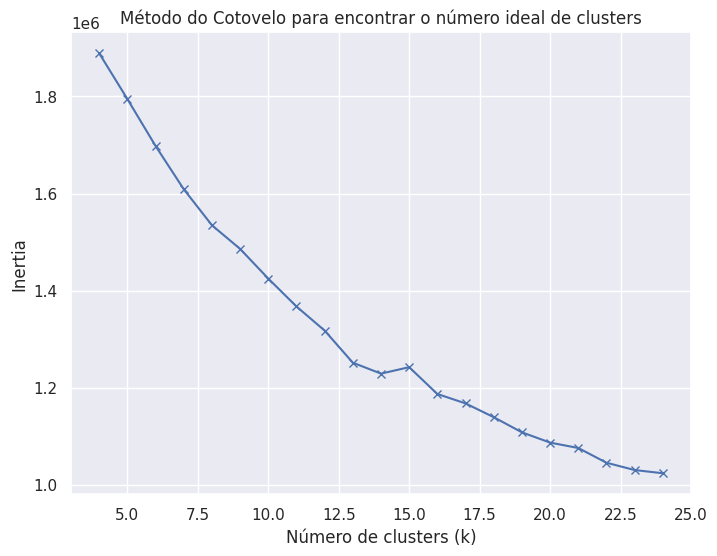

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/clus

Melhor n: 21 e melhor score: 0.1642404524648236


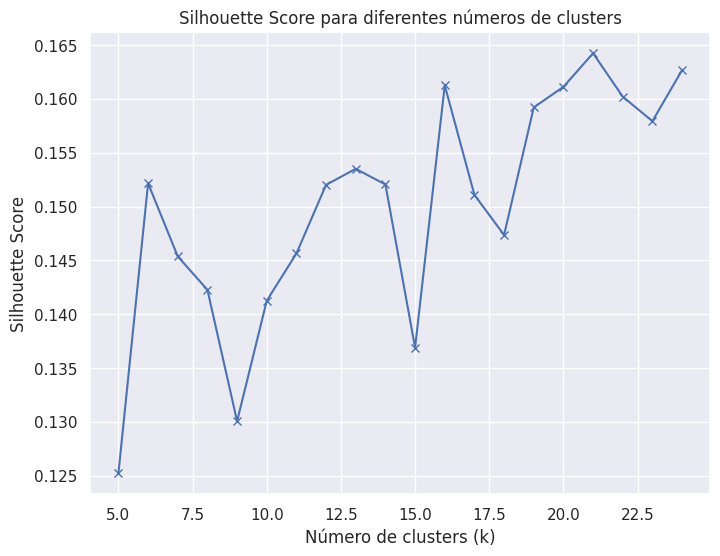

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Média da Pontuação de Silhueta para K-means: 0.1642404524648236
Centros dos clusters: [[ 2.36485716e-01 -1.59136090e-01 -2.33663654e-01  1.89562786e-01
   5.02756461e-01  2.84068387e-01 -3.95006325e-01  8.71999936e-01
  -1.86481288e-01  5.82861986e-01  4.13852461e-01 -2.99624051e-01
   1.40555189e+00  7.71734542e-01  1.30799249e-01 -4.13473650e-01
   4.10450595e-01  4.53531960e-01  1.58833831e-01 -1.85276895e-01
   4.07277847e-01 -2.58863818e-01]
 [ 2.37304721e-01 -1.59136090e-01 -2.37751804e-01  1.92535945e-01
  -8.68606190e-01  2.37126982e-01 -3.87695421e-01 -6.69526478e-01
  -4.93218711e-01 -7.25120879e-01 -4.87199782e-01 -2.87043628e-01
   1.40555189e+00 -5.80611036e-01 -4.47900770e-01 -3.12252785e-01
   4.26262783e-01 -2.30683147e-01 -5.12142248e-01 -1.85276895e-01
   4.08225719e-01 -1.88789998e-01]
 [ 2.09421884e-01 -1.58175156e-01 -2.33112470e-01  1.90929271e-01
   6.47490266e-01  2.45892338e-01  5.01964046e-01  5.21149663e-01
   5.83289707e-01  7.12751403e-01  6.22186923e-01  3

In [38]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preparação dos dados
X_kmeans = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

# Determinando o número ideal de clusters com o Método do Cotovelo
inertia = []
K = range(4, 25)
for k in K:
    kmeans = KMeans(n_clusters=k, verbose=1)
    kmeans.fit(X_scaled_kmeans)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para encontrar o número ideal de clusters')
plt.show()

# Avaliando diferentes números de clusters usando Silhouette Score
silhouette_scores = []
best_n = None
best_score = -2

for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(X_scaled_kmeans)
    labels = kmeans.labels_
    silhouette_score_value = silhouette_score(X_scaled_kmeans, labels)
    silhouette_scores.append(silhouette_score_value)

    if silhouette_score_value > best_score:
        best_score = silhouette_score_value
        best_n = k

print(f'Melhor n: {best_n} e melhor score: {best_score}')

# Plotando o gráfico do Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K[1:], silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.show()

# Treinando o modelo K-means com o número ideal de clusters
num_clusters = best_n  # Substituído pelo número ideal encontrado
kmeans = KMeans(n_clusters=num_clusters, random_state=13)
kmeans.fit(X_scaled_kmeans)

labels_kmeans = kmeans.predict(X_scaled_kmeans)
silhouette_avg_kmeans = silhouette_score(X_scaled_kmeans, labels_kmeans)
print("Média da Pontuação de Silhueta para K-means:", silhouette_avg_kmeans)

print("Centros dos clusters:", kmeans.cluster_centers_)


Initialization complete
Iteration 0, inertia 722084.244344311.
Iteration 1, inertia 539142.4401376118.
Iteration 2, inertia 533591.0098207527.
Iteration 3, inertia 533319.850505639.
Iteration 4, inertia 533282.0799048227.
Iteration 5, inertia 533271.8173778906.
Iteration 6, inertia 533265.806616945.
Iteration 7, inertia 533258.9955054043.
Iteration 8, inertia 533257.5483551432.
Converged at iteration 8: center shift 5.761105840853819e-05 within tolerance 9.999999999998842e-05.
Initialization complete


/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 806766.508158255.
Iteration 1, inertia 548081.1136795591.
Iteration 2, inertia 536977.62275973.
Iteration 3, inertia 526899.450916587.
Iteration 4, inertia 522543.2844530552.
Iteration 5, inertia 519363.270635972.
Iteration 6, inertia 516818.91954518715.
Iteration 7, inertia 516348.3503855596.
Iteration 8, inertia 516179.4661273074.
Iteration 9, inertia 516100.35264047806.
Iteration 10, inertia 516037.1022786886.
Iteration 11, inertia 516002.0875633593.
Iteration 12, inertia 515974.9760679683.
Iteration 13, inertia 515957.7143709473.
Iteration 14, inertia 515953.6639161884.
Converged at iteration 14: center shift 7.554741643905438e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 743633.2193359846.
Iteration 1, inertia 537530.4097422338.
Iteration 2, inertia 530216.7857832195.
Iteration 3, inertia 527913.3468660108.
Iteration 4, inertia 525588.4607787114.
Iteration 5, inertia 522057.49401015363.
Iteration 6, inertia 515374.060

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 3, inertia 513497.4096086276.
Iteration 4, inertia 507292.7504147644.
Iteration 5, inertia 501729.2952766349.
Iteration 6, inertia 497565.54893724935.
Iteration 7, inertia 494537.8144284804.
Iteration 8, inertia 493524.08020961523.
Iteration 9, inertia 493082.43409865414.
Iteration 10, inertia 492611.09402070125.
Iteration 11, inertia 492182.470182308.
Iteration 12, inertia 491808.9573168304.
Iteration 13, inertia 491603.8664618135.
Iteration 14, inertia 491518.0035266247.
Iteration 15, inertia 491479.49170125293.
Iteration 16, inertia 491455.42204014474.
Iteration 17, inertia 491430.51095762925.
Iteration 18, inertia 491417.0983254082.
Iteration 19, inertia 491405.57686836005.
Iteration 20, inertia 491394.68461849494.
Iteration 21, inertia 491381.9230490101.
Iteration 22, inertia 491379.1758655604.
Converged at iteration 22: center shift 6.494001004630939e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 686062.388416307.
Iteration 1, i

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 524482.493265093.
Iteration 2, inertia 511691.1131442598.
Iteration 3, inertia 502683.2695513363.
Iteration 4, inertia 493157.4924852534.
Iteration 5, inertia 487938.29037054064.
Iteration 6, inertia 482798.9513790238.
Iteration 7, inertia 477396.59240268444.
Iteration 8, inertia 474918.97102522885.
Iteration 9, inertia 473261.02236518275.
Iteration 10, inertia 472624.8707921316.
Iteration 11, inertia 471626.4247820144.
Iteration 12, inertia 469660.72384148976.
Iteration 13, inertia 467788.1160424853.
Iteration 14, inertia 467697.6693143401.
Iteration 15, inertia 467672.95174512075.
Iteration 16, inertia 467664.21309489105.
Iteration 17, inertia 467656.2258653998.
Iteration 18, inertia 467651.480620396.
Iteration 19, inertia 467648.56546537456.
Iteration 20, inertia 467644.3689924291.
Iteration 21, inertia 467643.77691781666.
Converged at iteration 21: center shift 3.064683530668636e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, in

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 476837.0136299756.
Iteration 3, inertia 471010.3170773324.
Iteration 4, inertia 465841.35329635185.
Iteration 5, inertia 462622.3087491394.
Iteration 6, inertia 462109.9375074282.
Iteration 7, inertia 460944.57184505655.
Iteration 8, inertia 460229.34927034786.
Iteration 9, inertia 459569.8001630947.
Iteration 10, inertia 457645.74570355343.
Iteration 11, inertia 454471.1456525256.
Iteration 12, inertia 452971.85169073433.
Iteration 13, inertia 452772.9420988253.
Iteration 14, inertia 452728.01158191246.
Iteration 15, inertia 452661.0072872129.
Iteration 16, inertia 452627.0476404434.
Iteration 17, inertia 452616.6691138071.
Iteration 18, inertia 452612.9170748354.
Iteration 19, inertia 452611.8619634259.
Converged at iteration 19: center shift 2.612876355785246e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 643575.2337555295.
Iteration 1, inertia 495327.2328795522.
Iteration 2, inertia 479482.1902145871.
Iteration 3, inert

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 483224.2432443242.
Iteration 2, inertia 463023.6189805027.
Iteration 3, inertia 455607.10832409415.
Iteration 4, inertia 452262.0498786379.
Iteration 5, inertia 449140.1638155092.
Iteration 6, inertia 444951.0990092786.
Iteration 7, inertia 442711.1611891737.
Iteration 8, inertia 441775.3716192745.
Iteration 9, inertia 441258.62016040133.
Iteration 10, inertia 440979.4460708526.
Iteration 11, inertia 440792.54729564826.
Iteration 12, inertia 440472.09589680465.
Iteration 13, inertia 440044.8150487933.
Iteration 14, inertia 439649.75754758535.
Iteration 15, inertia 439174.2912885188.
Iteration 16, inertia 438731.3249362537.
Iteration 17, inertia 437368.193636504.
Iteration 18, inertia 436718.14585694415.
Iteration 19, inertia 436465.8671338167.
Iteration 20, inertia 436204.91570487607.
Iteration 21, inertia 436018.07166892296.
Iteration 22, inertia 435899.97996707715.
Iteration 23, inertia 435824.14670218714.
Iteration 24, inertia 435774.04766377906.
Iteration 25, i

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 571957.1695421995.
Iteration 1, inertia 418112.7206561756.
Iteration 2, inertia 410860.86547514895.
Iteration 3, inertia 407783.92653368483.
Iteration 4, inertia 404515.2956888664.
Iteration 5, inertia 402214.60128896445.
Iteration 6, inertia 399621.40753039654.
Iteration 7, inertia 398853.79266553937.
Iteration 8, inertia 398581.1738770243.
Iteration 9, inertia 398470.0282393862.
Iteration 10, inertia 398457.27367854514.
Iteration 11, inertia 398451.5349030524.
Iteration 12, inertia 398448.88103792304.
Iteration 13, inertia 398447.648380885.
Iteration 14, inertia 398446.5365035811.
Converged at iteration 14: center shift 7.392994934742692e-07 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 579921.227653709.
Iteration 1, inertia 436844.5219351932.
Iteration 2, inertia 428503.71678012377.
Iteration 3, inertia 425523.9777136959.
Iteration 4, inertia 421291.8799702989.
Iteration 5, inertia 418482.00548958586

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 431356.2549667541.
Iteration 2, inertia 419979.2323528921.
Iteration 3, inertia 413756.3237672963.
Iteration 4, inertia 409337.47148204816.
Iteration 5, inertia 404025.1384728991.
Iteration 6, inertia 399846.09980511636.
Iteration 7, inertia 397748.16045574547.
Iteration 8, inertia 397073.49040433066.
Iteration 9, inertia 396800.01451312745.
Iteration 10, inertia 396751.2763466341.
Iteration 11, inertia 396740.8900650799.
Iteration 12, inertia 396737.20262057637.
Iteration 13, inertia 396734.1999234231.
Iteration 14, inertia 396731.7299937593.
Iteration 15, inertia 396729.90960491664.
Converged at iteration 15: center shift 3.4519762959410195e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 552703.6270103627.
Iteration 1, inertia 419813.33296703117.
Iteration 2, inertia 411191.1751746125.
Iteration 3, inertia 409933.424243354.
Iteration 4, inertia 409192.658194563.
Iteration 5, inertia 408555.2083134076.
Iteration 6, inertia 

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 393590.35270204156.
Iteration 2, inertia 380911.92723102187.
Iteration 3, inertia 377286.15599930997.
Iteration 4, inertia 374560.7288548972.
Iteration 5, inertia 374087.48202131246.
Iteration 6, inertia 373521.8248230108.
Iteration 7, inertia 371188.2921562849.
Iteration 8, inertia 365984.67805565073.
Iteration 9, inertia 365206.29785317776.
Iteration 10, inertia 365097.7168390327.
Iteration 11, inertia 365067.9005183873.
Iteration 12, inertia 365063.0684966888.
Iteration 13, inertia 365062.1751344474.
Iteration 14, inertia 365061.60412015166.
Converged at iteration 14: center shift 1.732928593918191e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 566309.1044339412.
Iteration 1, inertia 424291.9870688571.
Iteration 2, inertia 414830.8056144424.
Iteration 3, inertia 412024.7281638582.
Iteration 4, inertia 410109.36782953615.
Iteration 5, inertia 408829.84635834635.
Iteration 6, inertia 404622.2683546862.
Iteration 7, inertia

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 393713.66236713337.
Iteration 2, inertia 375821.55103565013.
Iteration 3, inertia 373008.4132162641.
Iteration 4, inertia 372536.4696640107.
Iteration 5, inertia 372159.21021165565.
Iteration 6, inertia 370777.4503936775.
Iteration 7, inertia 369287.3280456561.
Iteration 8, inertia 367684.853410967.
Iteration 9, inertia 367370.29945246095.
Iteration 10, inertia 367326.55893171625.
Iteration 11, inertia 367314.8627748051.
Iteration 12, inertia 367310.0104976689.
Iteration 13, inertia 367309.2977799121.
Iteration 14, inertia 367308.49219056184.
Iteration 15, inertia 367307.0945574002.
Iteration 16, inertia 367305.9489740492.
Iteration 17, inertia 367305.3616800131.
Converged at iteration 17: center shift 2.7761283200558044e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 556972.3402794371.
Iteration 1, inertia 396288.4914918886.
Iteration 2, inertia 382177.9884790457.
Iteration 3, inertia 377667.0530045551.
Iteration 4, inertia

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 395806.4800718887.
Iteration 2, inertia 385821.07069284254.
Iteration 3, inertia 380233.0791440932.
Iteration 4, inertia 378009.76390983403.
Iteration 5, inertia 377041.9084297752.
Iteration 6, inertia 375975.7648444171.
Iteration 7, inertia 373951.3284305414.
Iteration 8, inertia 372692.8592991369.
Iteration 9, inertia 372395.2363394316.
Iteration 10, inertia 372312.57416183746.
Iteration 11, inertia 372223.0913392427.
Iteration 12, inertia 372012.86338659364.
Iteration 13, inertia 371760.3097800556.
Iteration 14, inertia 371488.16075626784.
Iteration 15, inertia 371307.1951524378.
Iteration 16, inertia 371134.5072843665.
Iteration 17, inertia 370998.102682066.
Iteration 18, inertia 370932.09046191786.
Iteration 19, inertia 370890.7742184705.
Iteration 20, inertia 370850.7963099478.
Iteration 21, inertia 370838.610243206.
Iteration 22, inertia 370834.7314851216.
Iteration 23, inertia 370832.6404011328.
Iteration 24, inertia 370831.43280462455.
Iteration 25, inerti

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 3, inertia 334951.1513134694.
Iteration 4, inertia 334235.1799673581.
Iteration 5, inertia 334003.7041445106.
Iteration 6, inertia 333757.8737765061.
Iteration 7, inertia 333584.30995236244.
Iteration 8, inertia 333309.4921417395.
Iteration 9, inertia 333042.9737396455.
Iteration 10, inertia 332521.1738372887.
Iteration 11, inertia 332001.861573447.
Iteration 12, inertia 331698.78878429416.
Iteration 13, inertia 331566.6395987693.
Iteration 14, inertia 331394.7590380056.
Iteration 15, inertia 331304.4068793901.
Iteration 16, inertia 331237.955550805.
Iteration 17, inertia 331148.9975966515.
Iteration 18, inertia 331119.29907721357.
Iteration 19, inertia 331109.24622513435.
Iteration 20, inertia 331098.4064094263.
Iteration 21, inertia 331088.77176436095.
Iteration 22, inertia 331081.91487340105.
Iteration 23, inertia 331076.042721923.
Iteration 24, inertia 331065.31566854997.
Iteration 25, inertia 331050.6279503671.
Iteration 26, inertia 331009.6839226.
Iteration 27, inertia 

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 347961.0779010846.
Iteration 3, inertia 340254.17432451143.
Iteration 4, inertia 333819.3218082409.
Iteration 5, inertia 332959.29192283755.
Iteration 6, inertia 331209.0993554689.
Iteration 7, inertia 325463.30614939024.
Iteration 8, inertia 318226.23961304204.
Iteration 9, inertia 318178.6321576025.
Iteration 10, inertia 318165.37105150486.
Iteration 11, inertia 318163.2070555343.
Converged at iteration 11: center shift 8.097010384899782e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 505326.0874719968.
Iteration 1, inertia 352277.5973836096.
Iteration 2, inertia 339725.5165083413.
Iteration 3, inertia 335406.5759432585.
Iteration 4, inertia 333232.9934638109.
Iteration 5, inertia 332205.2213768314.
Iteration 6, inertia 331265.05171183305.
Iteration 7, inertia 330689.40387913754.
Iteration 8, inertia 329808.77343535627.
Iteration 9, inertia 329114.55019775254.
Iteration 10, inertia 328187.604885284.
Iteration 11, inertia 3

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 497365.40957186895.
Iteration 1, inertia 373954.55289098504.
Iteration 2, inertia 362902.2852947743.
Iteration 3, inertia 358168.13873273804.
Iteration 4, inertia 355224.2888808797.
Iteration 5, inertia 349077.27720143646.
Iteration 6, inertia 341566.2735453556.
Iteration 7, inertia 339445.38136968995.
Iteration 8, inertia 339216.94528128236.
Iteration 9, inertia 339166.3501430908.
Iteration 10, inertia 339146.3954028697.
Iteration 11, inertia 339131.8920329315.
Iteration 12, inertia 339128.41928207333.
Converged at iteration 12: center shift 8.716373170857965e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 462488.75920635246.
Iteration 1, inertia 352236.8504801875.
Iteration 2, inertia 343654.41087009024.
Iteration 3, inertia 337583.8673584092.
Iteration 4, inertia 335711.7042479328.
Iteration 5, inertia 335109.57515977736.
Iteration 6, inertia 334696.8688197964.
Iteration 7, inertia 334401.2036893423.
Iteration 8, inertia 

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 491463.3484321214.
Iteration 1, inertia 348407.6669784343.
Iteration 2, inertia 327620.7383364287.
Iteration 3, inertia 318963.6602626714.
Iteration 4, inertia 317063.75518792594.
Iteration 5, inertia 316342.6216602895.
Iteration 6, inertia 315842.43759917753.
Iteration 7, inertia 315657.726073746.
Iteration 8, inertia 315584.47489707335.
Iteration 9, inertia 315553.9552471274.
Iteration 10, inertia 315537.83938579424.
Iteration 11, inertia 315522.5357583177.
Iteration 12, inertia 315502.7245911007.
Iteration 13, inertia 315473.8376378328.
Iteration 14, inertia 315467.07821111433.
Iteration 15, inertia 315464.37894254475.
Iteration 16, inertia 315457.56638565933.
Iteration 17, inertia 315432.8605975602.
Iteration 18, inertia 315411.384802585.
Iteration 19, inertia 315351.1633316551.
Iteration 20, inertia 315232.1060422778.
Iteration 21, inertia 314914.86567398853.
Iteration 22, inertia 314159.6629537629.
Iteration 23, inertia 312100.0632429728.
Iteration 24, inerti

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 449669.47710487264.
Iteration 1, inertia 318967.86218631896.
Iteration 2, inertia 301970.8467502799.
Iteration 3, inertia 296874.78075830283.
Iteration 4, inertia 294900.8817526309.
Iteration 5, inertia 293502.0498091825.
Iteration 6, inertia 293319.8576196571.
Iteration 7, inertia 293237.58028563875.
Iteration 8, inertia 293095.1174963926.
Iteration 9, inertia 293034.4227030253.
Iteration 10, inertia 292956.6001191673.
Iteration 11, inertia 292917.2970927144.
Iteration 12, inertia 292914.66154645797.
Converged at iteration 12: center shift 4.5188826789952896e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 455634.60423848045.
Iteration 1, inertia 319871.73359817005.
Iteration 2, inertia 307864.43422880524.
Iteration 3, inertia 305149.5354594469.
Iteration 4, inertia 303637.7851944873.
Iteration 5, inertia 302197.3767906207.
Iteration 6, inertia 301344.6232108979.
Iteration 7, inertia 300338.8197083065

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 338729.9480685836.
Iteration 2, inertia 322692.3044446199.
Iteration 3, inertia 318879.16140431445.
Iteration 4, inertia 314859.61462931224.
Iteration 5, inertia 309793.2361956998.
Iteration 6, inertia 303446.32780887187.
Iteration 7, inertia 302471.5746071888.
Iteration 8, inertia 302397.0594542841.
Iteration 9, inertia 302376.53811498045.
Iteration 10, inertia 302368.0818732945.
Iteration 11, inertia 302356.30483626755.
Iteration 12, inertia 302349.986135551.
Iteration 13, inertia 302343.250931474.
Iteration 14, inertia 302341.7738125323.
Iteration 15, inertia 302341.122610871.
Converged at iteration 15: center shift 1.973954864157602e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 447460.01926833676.
Iteration 1, inertia 320632.8341707123.
Iteration 2, inertia 307036.2271722374.
Iteration 3, inertia 300103.3017320281.
Iteration 4, inertia 291857.58632006845.
Iteration 5, inertia 288805.38629879087.
Iteration 6, inertia 28

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 322042.5549171258.
Iteration 2, inertia 313351.530091835.
Iteration 3, inertia 309377.1097869546.
Iteration 4, inertia 306715.83884434134.
Iteration 5, inertia 302014.86260132754.
Iteration 6, inertia 298339.0317548581.
Iteration 7, inertia 297243.75559091487.
Iteration 8, inertia 296908.0152414596.
Iteration 9, inertia 296800.69124511356.
Iteration 10, inertia 296750.6224025499.
Iteration 11, inertia 296707.94062182883.
Iteration 12, inertia 296690.7507185039.
Iteration 13, inertia 296685.0677173709.
Iteration 14, inertia 296665.9899989678.
Iteration 15, inertia 296644.6612582675.
Iteration 16, inertia 296639.7391167536.
Iteration 17, inertia 296631.2272724153.
Iteration 18, inertia 296616.4227297943.
Iteration 19, inertia 296615.2234258796.
Converged at iteration 19: center shift 1.9617723264123477e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 431646.2163810688.
Iteration 1, inertia 305199.7620129392.
Iteration 2, inerti

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 1, inertia 328039.1418726647.
Iteration 2, inertia 319482.3558355114.
Iteration 3, inertia 312510.7954871245.
Iteration 4, inertia 310170.5756063973.
Iteration 5, inertia 307340.71071429935.
Iteration 6, inertia 306284.23539005994.
Iteration 7, inertia 305105.5582272864.
Iteration 8, inertia 302243.1848679178.
Iteration 9, inertia 294141.4829033348.
Iteration 10, inertia 292986.1735195365.
Iteration 11, inertia 292824.70865776954.
Iteration 12, inertia 292438.40654053946.
Iteration 13, inertia 291675.9036814396.
Iteration 14, inertia 289892.38418234966.
Iteration 15, inertia 282703.99031195213.
Iteration 16, inertia 281016.7397877373.
Iteration 17, inertia 280988.5097420248.
Iteration 18, inertia 280982.65294895077.
Iteration 19, inertia 280964.6945578749.
Iteration 20, inertia 280947.29546461423.
Iteration 21, inertia 280911.93173526233.
Iteration 22, inertia 280881.8251682613.
Iteration 23, inertia 280874.7082944931.
Iteration 24, inertia 280841.8733256763.
Iteration 25, in

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 7, inertia 283407.23571654235.
Iteration 8, inertia 283282.6643763474.
Iteration 9, inertia 283143.58468094777.
Iteration 10, inertia 283095.3619178766.
Iteration 11, inertia 283075.741529905.
Iteration 12, inertia 283053.7674532983.
Iteration 13, inertia 283008.4789685942.
Iteration 14, inertia 282863.9830581454.
Iteration 15, inertia 282744.3533168472.
Iteration 16, inertia 282609.8681989761.
Iteration 17, inertia 282477.23193591426.
Iteration 18, inertia 282091.5063770482.
Iteration 19, inertia 281212.01706135843.
Iteration 20, inertia 280685.2638001972.
Iteration 21, inertia 280588.1956391708.
Iteration 22, inertia 280574.97953566955.
Iteration 23, inertia 280550.75838894973.
Iteration 24, inertia 280540.8045008368.
Iteration 25, inertia 280539.500125547.
Iteration 26, inertia 280539.2386876375.
Converged at iteration 26: center shift 1.5740288077715686e-05 within tolerance 9.999999999998842e-05.
Initialization complete
Iteration 0, inertia 431588.11403857666.
Iteration 1

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 411496.22434528026.
Iteration 1, inertia 292601.3766300141.
Iteration 2, inertia 284878.2209266202.
Iteration 3, inertia 280017.4575692398.
Iteration 4, inertia 277393.32287863846.
Iteration 5, inertia 276183.7790633902.
Iteration 6, inertia 274757.6592303337.
Iteration 7, inertia 274301.3082790398.
Iteration 8, inertia 273940.4112382682.
Iteration 9, inertia 273660.6078794712.
Iteration 10, inertia 273438.96561856597.
Iteration 11, inertia 273101.8986731415.
Iteration 12, inertia 272742.8156979817.
Iteration 13, inertia 271789.08693033067.
Iteration 14, inertia 271426.5339878918.
Iteration 15, inertia 271335.7480196274.
Iteration 16, inertia 271307.25461241126.
Iteration 17, inertia 271281.9426989976.
Iteration 18, inertia 271258.18345278717.
Iteration 19, inertia 271241.06572857976.
Iteration 20, inertia 271232.3466113838.
Iteration 21, inertia 271228.7164157536.
Iteration 22, inertia 271226.47335726855.
Iteration 23, inertia 271224.982774

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 399661.29085311986.
Iteration 1, inertia 289054.9097165238.
Iteration 2, inertia 278113.7394737518.
Iteration 3, inertia 274584.1214569302.
Iteration 4, inertia 272616.2549302664.
Iteration 5, inertia 271313.6901876156.
Iteration 6, inertia 270919.1457869021.
Iteration 7, inertia 270521.55778177676.
Iteration 8, inertia 270244.6644681141.
Iteration 9, inertia 269842.69596446765.
Iteration 10, inertia 269703.2811175109.
Iteration 11, inertia 269682.08581532096.
Iteration 12, inertia 269680.4824929329.
Iteration 13, inertia 269679.6411013093.
Iteration 14, inertia 269679.3344234482.
Iteration 15, inertia 269679.2337942301.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 418929.37464704225.
Iteration 1, inertia 291388.5606865776.
Iteration 2, inertia 280973.1493768104.
Iteration 3, inertia 278223.17305968906.
Iteration 4, inertia 277405.24234239565.
Iteration 5, inertia 276744.71938844625.
Iteration 6

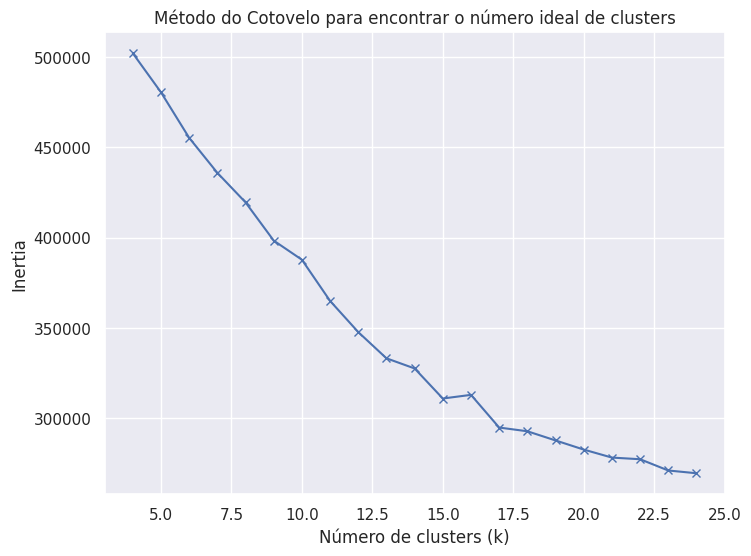

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/clus

Melhor n: 7 e melhor score: 0.15558273755250907


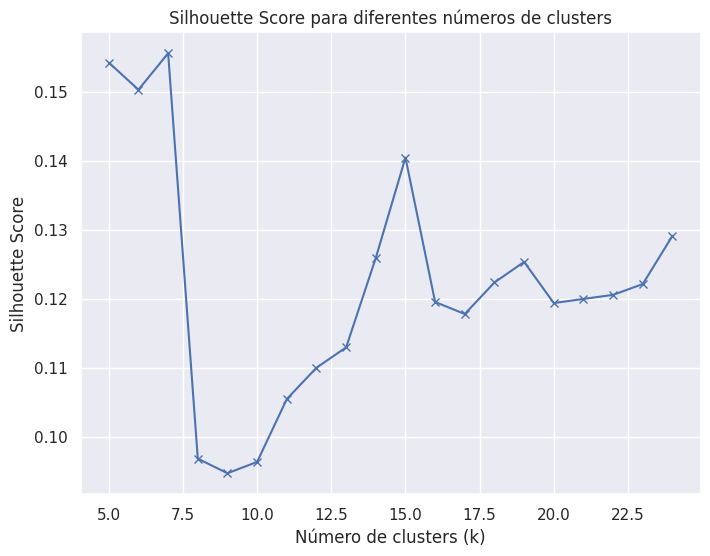

/home/marcelo/Documentos/puc/tcc/python/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Média da Pontuação de Silhueta para K-means: 0.15558273755250907
Centros dos clusters: [[ 1.57243030e-01 -6.15783252e-02  2.79673179e-02  1.15676947e-01
  -7.27584632e-01 -1.97506553e-01 -7.10344671e-01 -9.70856541e-01
  -3.48547761e-01 -6.26208296e-01 -6.00424555e-01 -3.29001151e-01
   3.38077924e-01 -5.53731959e-01 -3.72214694e-01 -2.18718525e-01
   1.83381615e-01 -5.37476641e-01 -5.92732197e-01 -2.49377239e-01
   5.95847591e-02  5.62965791e-02]
 [ 1.57243030e-01 -6.15783252e-02 -9.12007716e-02  1.15676947e-01
   3.17401527e-01  2.86787484e-01  1.25571172e-01  4.82891303e-01
  -4.36753436e-01  2.12371932e-01  3.07372939e-01 -7.72666743e-02
  -8.23062870e-02  2.84023059e-01  1.57687998e-01 -7.82797369e-02
   1.83381615e-01  2.50282230e-01  1.77890761e-01 -2.10509924e-01
   5.33049192e-01 -1.05842395e-01]
 [ 1.57243030e-01 -6.15783252e-02 -1.03091964e-01  1.15676947e-01
   2.56324700e-01 -3.95611317e-01  5.20868084e-01  2.37801230e-02
   1.47013216e+00  3.70011108e-01  7.88955043e-03  

In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preparação dos dados
X_kmeans = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

# Determinando o número ideal de clusters com o Método do Cotovelo
inertia = []
K = range(4, 25)
for k in K:
    kmeans = KMeans(n_clusters=k, verbose=1)
    kmeans.fit(X_scaled_kmeans)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo para encontrar o número ideal de clusters')
plt.show()

# Avaliando diferentes números de clusters usando Silhouette Score
silhouette_scores = []
best_n = None
best_score = -2

for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(X_scaled_kmeans)
    labels = kmeans.labels_
    silhouette_score_value = silhouette_score(X_scaled_kmeans, labels)
    silhouette_scores.append(silhouette_score_value)

    if silhouette_score_value > best_score:
        best_score = silhouette_score_value
        best_n = k

print(f'Melhor n: {best_n} e melhor score: {best_score}')

# Plotando o gráfico do Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K[1:], silhouette_scores, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes números de clusters')
plt.show()

# Treinando o modelo K-means com o número ideal de clusters
num_clusters = best_n  # Substituído pelo número ideal encontrado
kmeans = KMeans(n_clusters=num_clusters, random_state=13)
kmeans.fit(X_scaled_kmeans)

labels_kmeans = kmeans.predict(X_scaled_kmeans)
silhouette_avg_kmeans = silhouette_score(X_scaled_kmeans, labels_kmeans)
print("Média da Pontuação de Silhueta para K-means:", silhouette_avg_kmeans)

print("Centros dos clusters:", kmeans.cluster_centers_)


### Random Search

In [44]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV

# Preparação dos dados
X_kmeans = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])
y_kmeans = df_microdados_fund['CLASSE_ABAND']  # Variável alvo para comparação

# Padronização dos dados
scaler = StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

# Função customizada para calcular Silhouette Score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Parâmetros para RandomizedSearchCV
param_distributions = {'n_clusters': range(3, 20)}

# RandomizedSearchCV para KMeans
random_search_kmeans = RandomizedSearchCV(
    KMeans(n_init=10),
    param_distributions,
    n_iter=10,
    scoring=silhouette_scorer,
    verbose=1  # Para acompanhar a execução
)
random_search_kmeans.fit(X_scaled_kmeans)

# Melhor modelo
best_kmeans = random_search_kmeans.best_estimator_
print(f'Melhor número de clusters: {best_kmeans.n_clusters}')

# Score do melhor modelo
best_score = random_search_kmeans.best_score_
print(f'Silhouette Score do melhor modelo: {best_score}')

# Previsão dos clusters
labels_kmeans = best_kmeans.predict(X_scaled_kmeans)

# Adicionar os labels dos clusters ao DataFrame original
df_clusters = df_microdados_fund.copy()
df_clusters['Cluster'] = labels_kmeans

# Comparar os clusters com a variável alvo
cluster_summary = df_clusters.groupby(['Cluster', 'CLASSE_ABAND']).size().unstack(fill_value=0)

print("Resumo dos clusters comparado com a variável alvo:")
print(cluster_summary)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhor número de clusters: 14
Resumo dos clusters comparado com a variável alvo:
CLASSE_ABAND  Muito Baixo  Baixo  Médio  Alto  Muito Alto
Cluster                                                  
0                    3643    315    396   353         388
1                    8564   1094   1106   888         710
2                    2058     49    118   262         678
3                    5419   1360   1301  1067         589
4                    7839   1663   1644  1259         824
5                    4372    227    281   200         134
6                    3442    247    135    97          71
7                    1871     34     99   184         654
8                   15747   1072   1973  2361        2733
9                    7846    105    344   691        1585
10                   6491   1313   1273  1057         759
11                   5880   1211    998   654         391
12                   5318    938    754   489 

In [46]:
random_search_kmeans.best_score_

0.1696317576935236

# DBScam

In [38]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Preparação dos dados
X_dbscan = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Criar e ajustar o modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # você pode ajustar os parâmetros eps e min_samples conforme necessário
labels_dbscan = dbscan.fit_predict(X_scaled_dbscan)

# Avaliação usando a pontuação de silhueta (somente se houver mais de um cluster)
if len(set(labels_dbscan)) > 1:
    silhouette_avg_dbscan = silhouette_score(X_scaled_dbscan, labels_dbscan)
    print("Média da Pontuação de Silhueta para DBSCAN:", silhouette_avg_dbscan)
else:
    print("DBSCAN não encontrou clusters significativos.")

# Contagem de pontos por cluster
unique, counts = np.unique(labels_dbscan, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Contagem de pontos por cluster:", cluster_counts)


Média da Pontuação de Silhueta para DBSCAN: 0.6940217576587803
Contagem de pontos por cluster: {-1: 22018, 0: 444, 1: 2114, 2: 23, 3: 369, 4: 176, 5: 33, 6: 244, 7: 42, 8: 13, 9: 5, 10: 23, 11: 525, 12: 13, 13: 32, 14: 1035, 15: 9, 16: 111, 17: 1124, 18: 160, 19: 53, 20: 183, 21: 334, 22: 9, 23: 156, 24: 28, 25: 28, 26: 20, 27: 46, 28: 87, 29: 226, 30: 75, 31: 85, 32: 43, 33: 30, 34: 121, 35: 31, 36: 121, 37: 107, 38: 120, 39: 119, 40: 11, 41: 36, 42: 9, 43: 16, 44: 11, 45: 45, 46: 82, 47: 9, 48: 12, 49: 12, 50: 43, 51: 15, 52: 23, 53: 28, 54: 20, 55: 78, 56: 302, 57: 749, 58: 442, 59: 7, 60: 10, 61: 36, 62: 13, 63: 68, 64: 11, 65: 144, 66: 150, 67: 14, 68: 698, 69: 34, 70: 69, 71: 139, 72: 19, 73: 10, 74: 13, 75: 158, 76: 60, 77: 138, 78: 184, 79: 56, 80: 22, 81: 125, 82: 8, 83: 163, 84: 120, 85: 13, 86: 7, 87: 87, 88: 8, 89: 102, 90: 103, 91: 41, 92: 71, 93: 128, 94: 1103, 95: 29, 96: 134, 97: 23, 98: 71, 99: 34, 100: 1006, 101: 32, 102: 63, 103: 182, 104: 101, 105: 42, 106: 60, 107:

### Melhoria do DBSCam

Melhor parâmetro eps: 0.1
Melhor parâmetro min_samples: 650
Melhor Silhouette Score: -0.09779179865721677
Contagem de pontos por cluster: {-1: 107401, 0: 2114, 1: 1035, 2: 1124, 3: 749, 4: 698, 5: 1103, 6: 1006, 7: 2072, 8: 839, 9: 732, 10: 868, 11: 1115}
Número de clusters encontrados: 12


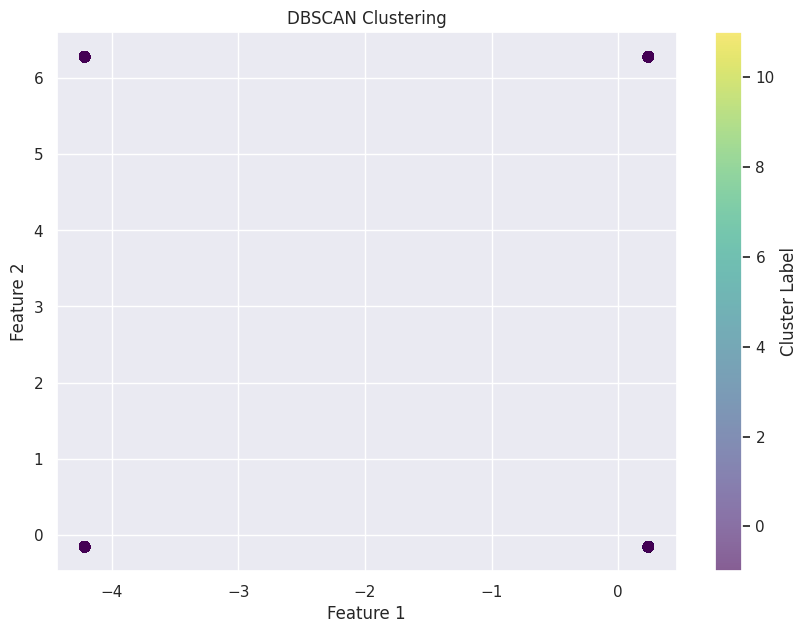

Resumo dos clusters comparado com a variável alvo:
CLASSE_ABAND  Muito Baixo  Baixo  Médio  Alto  Muito Alto
Cluster                                                  
-1                  70247   9412   9853  8729        9160
 0                   1724      3     23    86         278
 1                    815      8     30    66         116
 2                    791     15     64   115         139
 3                    591      9     38    39          72
 4                    529     27     48    50          44
 5                    754     36    100   113         100
 6                    704     23     56    82         141
 7                   1613      4     28   106         321
 8                    531     43     66    94         105
 9                    570      3     21    44          94
 10                   663      6     33    54         112
 11                   718     45     88   137         127


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Preparação dos dados
X_dbscan = df_microdados_fund.drop(columns=['CO_ENTIDADE', 'ABAND_FUND', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Definindo uma grade de parâmetros para DBSCAN
param_grid = {
    'eps': np.linspace(0.1, 1.5, 10),
    'min_samples': range(500, 1000, 150)
}

best_score = -1
best_params = None
best_labels = None

# Busca por grade
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_scaled_dbscan)
    
    if len(set(labels)) > 1:  # Considerar apenas se há mais de um cluster
        score = silhouette_score(X_scaled_dbscan, labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_labels = labels

print(f"Melhor parâmetro eps: {best_params['eps']}")
print(f"Melhor parâmetro min_samples: {best_params['min_samples']}")
print(f"Melhor Silhouette Score: {best_score}")

# Contagem de pontos por cluster
unique, counts = np.unique(best_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Contagem de pontos por cluster:", cluster_counts)

# Número de clusters encontrados (excluindo ruído, se presente)
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f"Número de clusters encontrados: {num_clusters}")

# Visualização dos clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_dbscan[:, 0], X_scaled_dbscan[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Adicionar os labels dos clusters ao DataFrame original
df_clusters_dbscan = df_microdados_fund.copy()
df_clusters_dbscan['Cluster'] = best_labels

# Comparar os clusters com a variável alvo
cluster_summary_dbscan = df_clusters_dbscan.groupby(['Cluster', 'CLASSE_ABAND']).size().unstack(fill_value=0)

print("Resumo dos clusters comparado com a variável alvo:")
print(cluster_summary_dbscan)


Melhor parâmetro eps: 0.7222222222222222
Melhor parâmetro min_samples: 500
Melhor Silhouette Score: -0.19709027854445477
Contagem de pontos por cluster: {-1: 28691, 0: 693}
Número de clusters encontrados: 1


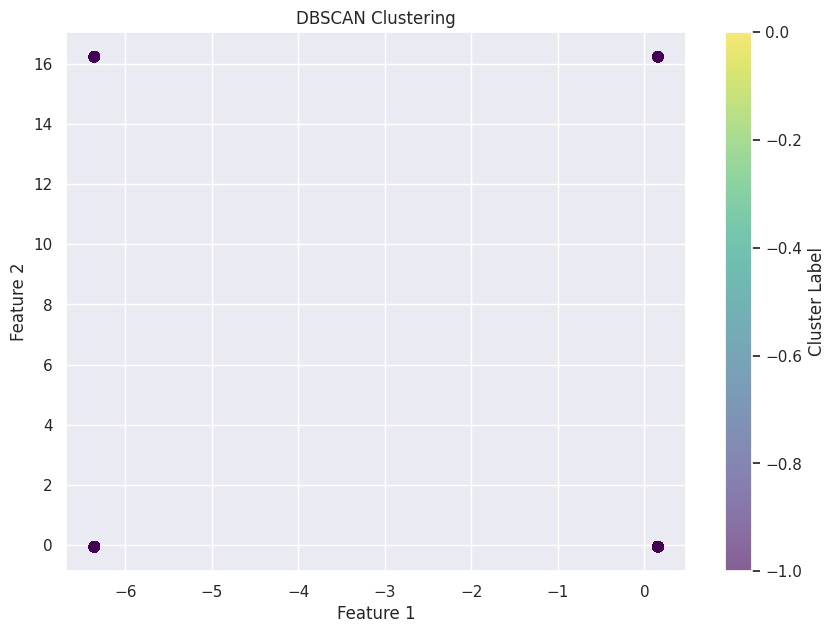

Resumo dos clusters comparado com a variável alvo:
CLASSE_ABAND  Muito Baixo  Baixo  Médio  Alto  Muito Alto
Cluster                                                  
-1                  12564   3942   4030  3892        4263
 0                    146    129    142   155         121


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Preparação dos dados
X_dbscan = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])

# Padronização dos dados
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Definindo uma grade de parâmetros para DBSCAN
param_grid = {
    'eps': np.linspace(0.1, 1.5, 10),
    'min_samples': range(500, 1000, 150)
}

best_score = -1
best_params = None
best_labels = None

# Busca por grade
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_scaled_dbscan)
    
    if len(set(labels)) > 1:  # Considerar apenas se há mais de um cluster
        score = silhouette_score(X_scaled_dbscan, labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_labels = labels

print(f"Melhor parâmetro eps: {best_params['eps']}")
print(f"Melhor parâmetro min_samples: {best_params['min_samples']}")
print(f"Melhor Silhouette Score: {best_score}")

# Contagem de pontos por cluster
unique, counts = np.unique(best_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Contagem de pontos por cluster:", cluster_counts)

# Número de clusters encontrados (excluindo ruído, se presente)
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f"Número de clusters encontrados: {num_clusters}")

# Visualização dos clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_dbscan[:, 0], X_scaled_dbscan[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Adicionar os labels dos clusters ao DataFrame original
df_clusters_dbscan = df_microdados_med.copy()
df_clusters_dbscan['Cluster'] = best_labels

# Comparar os clusters com a variável alvo
cluster_summary_dbscan = df_clusters_dbscan.groupby(['Cluster', 'CLASSE_ABAND']).size().unstack(fill_value=0)

print("Resumo dos clusters comparado com a variável alvo:")
print(cluster_summary_dbscan)


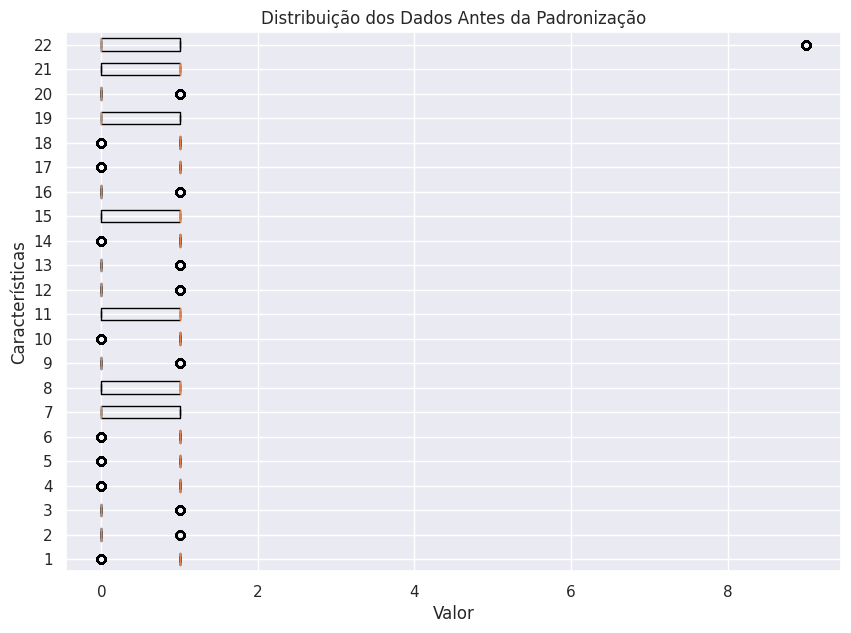

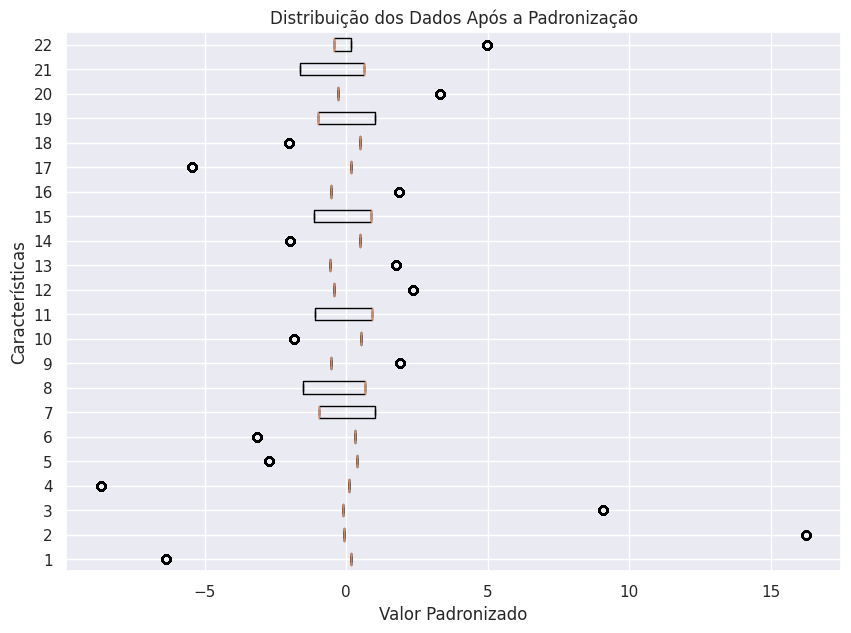

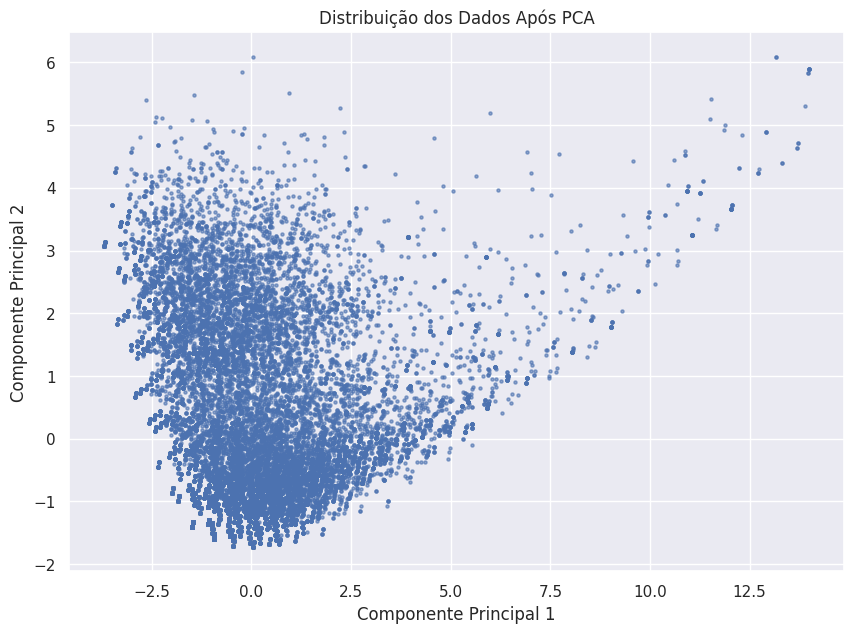

Melhor parâmetro eps: 1.7
Melhor parâmetro min_samples: 50
Melhor Silhouette Score: 0.8099801640252327
Contagem de pontos por cluster: {-1: 8, 0: 29376}
Número de clusters encontrados: 1


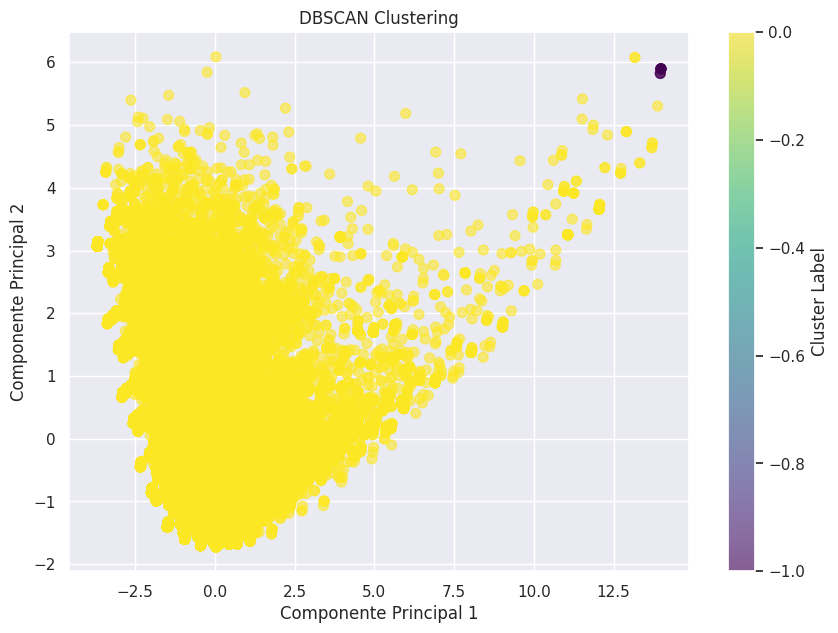

Resumo dos clusters comparado com a variável alvo:
CLASSE_ABAND  Muito Baixo  Baixo  Médio  Alto  Muito Alto
Cluster                                                  
-1                      3      0      2     0           3
 0                  12707   4071   4170  4047        4381


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA

# Preparação dos dados
X_dbscan = df_microdados_med.drop(columns=['CO_ENTIDADE', 'ABAND_MED', 'CLASSE_ABAND'])

# Visualização da distribuição dos dados antes da padronização
plt.figure(figsize=(10, 7))
plt.boxplot(X_dbscan, vert=False)
plt.title('Distribuição dos Dados Antes da Padronização')
plt.xlabel('Valor')
plt.ylabel('Características')
plt.show()

# Padronização dos dados
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_dbscan)

# Visualização da distribuição dos dados após a padronização
plt.figure(figsize=(10, 7))
plt.boxplot(X_scaled_dbscan, vert=False)
plt.title('Distribuição dos Dados Após a Padronização')
plt.xlabel('Valor Padronizado')
plt.ylabel('Características')
plt.show()

# Redução de dimensionalidade com PCA para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_dbscan)

# Visualização dos dados após PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.6)
plt.title('Distribuição dos Dados Após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Definindo uma grade de parâmetros para DBSCAN
param_grid = {
    'eps': np.linspace(0.1, 2.0, 20),  # Aumentar o intervalo de eps
    'min_samples': range(50, 1000, 100)  # Ajustar min_samples
}

best_score = -1
best_params = None
best_labels = None

# Busca por grade
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_pca)
    
    if len(set(labels)) > 1:  # Considerar apenas se há mais de um cluster
        score = silhouette_score(X_pca, labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_labels = labels

print(f"Melhor parâmetro eps: {best_params['eps']}")
print(f"Melhor parâmetro min_samples: {best_params['min_samples']}")
print(f"Melhor Silhouette Score: {best_score}")

# Contagem de pontos por cluster
unique, counts = np.unique(best_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Contagem de pontos por cluster:", cluster_counts)

# Número de clusters encontrados (excluindo ruído, se presente)
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f"Número de clusters encontrados: {num_clusters}")

# Visualização dos clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Adicionar os labels dos clusters ao DataFrame original
df_clusters_dbscan = df_microdados_med.copy()
df_clusters_dbscan['Cluster'] = best_labels

# Comparar os clusters com a variável alvo
cluster_summary_dbscan = df_clusters_dbscan.groupby(['Cluster', 'CLASSE_ABAND']).size().unstack(fill_value=0)

print("Resumo dos clusters comparado com a variável alvo:")
print(cluster_summary_dbscan)


In [ ]:

valores_unicos, contagens = np.unique(y_pred, return_counts=True)

# Criando um dicionário com os resultados para fácil visualização
contagem_valores = dict(zip(valores_unicos, contagens))

print(contagem_valores)

valores_unicos, contagens = np.unique(y_test, return_counts=True)

# Criando um dicionário com os resultados para fácil visualização
contagem_valores = dict(zip(valores_unicos, contagens))

print(contagem_valores)

{'Alto': 15560, 'Baixo': 26389, 'Muito Alto': 19772, 'Muito Baixo': 11841, 'Médio': 6688}
{'Alto': 15940, 'Baixo': 16107, 'Muito Alto': 16190, 'Muito Baixo': 16046, 'Médio': 15967}
